In [137]:
#import pandas package to process the data 
#import os package to be able to locate WD 
import pandas as pd
import os
import matplotlib 
from matplotlib import figure
import numpy as np
from scipy import stats
import tweepy
import math
import time 
import sys
import datetime
import copy
from datetime import datetime
import json
import re
import matplotlib.pyplot as plt 
import plotly.plotly as py
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from statsmodels.formula.api import logit, probit, poisson, ols

In [138]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')
from nltk import tokenize

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/trishaharjani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Reading, filter for english, sort chronologically 

In [139]:
#Assigning the value 'data' to my CSV file
data = pd.read_csv('ref_data.csv', low_memory=False, dtype=None, encoding = 'utf_8') 

In [140]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000 
data.head(10)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Mon May 21 17:16:37 +0000 2018,Together4Yes,NaN,NaN,7,998613546119331840,NaN,NaN,NaN,en,"Longford, Ireland",NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I’m also voting yes for all my friends. Some of whom had to make the journey to the U.K. and others who’s pregnancy ended in tradgedy with no option to travel. I never want them to endure the pain of travelling along with everything else ever again 💔 #Together4Yes,https://twitter.com/TanitaCampbell/status/998613546119331840,Tue Dec 18 15:48:37 +0000 2012,TanitaCampbell,False,22 • Mama to Georgia • Ireland ✨ REPEALTHE8th❤️,3035,316,378,2,"Longford, Ireland",Tanita,TanitaCampbell,4777,NaN,NaN,False
1,NaN,Mon May 21 17:18:05 +0000 2018,NaN,NaN,NaN,0,998613914953879554,NaN,NaN,NaN,en,NaN,NaN,3,9.985643e+17,morningireland,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>","RT @morningireland: Why did one-third of the congregation walk out of a First Communion mass in Clogherhead, Co Louth? Our reporter @cian_m…",https://twitter.com/DakotaLula/status/998613914953879554,Thu Jan 26 22:05:45 +0000 2017,DakotaLula,False,#AnimalRights #HumanRights #TheResistance #ClimateChangeisreal,3786,228,223,3,NaN,MaryLovesBooks,DakotaLula,3600,NaN,NaN,False
2,NaN,Mon May 21 17:16:13 +0000 2018,repeal loveboth,NaN,NaN,0,998613444529139720,NaN,NaN,NaN,en,NaN,NaN,170,9.942626e+17,coffeethenbacon,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @coffeethenbacon: Let’s talk #repeal and some of the lies being handed out by the #loveboth campaign - numero one “a baby’s eyes open at…,https://twitter.com/thaofleming15/status/998613444529139720,Mon May 21 16:56:34 +0000 2018,thaofleming15,False,NaN,0,1,0,0,NaN,thao fleming,thaofleming15,44,NaN,NaN,False
3,NaN,Mon May 21 17:17:22 +0000 2018,NaN,NaN,NaN,0,998613735219527686,NaN,NaN,NaN,en,NaN,NaN,37,9.985550e+17,Jimcorrsays,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Lite</a>",RT @Jimcorrsays: “My daughter Dolores was completely opposed to abortion. All our family will be voting no on the 25th of May.” - Mother of…,https://twitter.com/daithiorourke/status/998613735219527686,Sun Jun 22 19:29:32 +0000 2014,daithiorourke,False,"#EOSFreedom #DigitalMarketing Strategists #Consultant Love #Networking, #PersonalBranding, #SocialMedia and most of all #Blogging, Coffee and Good Beer.",6429,4249,1919,162,Carrickmacross,David O'Rourke,daithiorourke,7055,NaN,http://daithiorourke.com,False
4,NaN,Mon May 21 17:17:40 +0000 2018,repealthe8th together4yes,NaN,NaN,0,998613809509093376,NaN,NaN,NaN,en,NaN,NaN,5,9.986129e+17,VivaJerryFish,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @VivaJerryFish: RT ⭐️ YES! ♥️ Please Share! + RT! ♥️ Vote YES #repealthe8th this Friday 25th of May. #together4yes Big LOVE, Jerry Fish…",https://twitter.com/EvaJanez/status/998613809509093376,Sat Jun 06 15:16:15 +0000 2009,EvaJanez,False,"/Ní Ghamhna , Film & TV",11343,2241,1123,0,Dublin,Eva-Jane Gaffney,EvaJanez,13623,NaN,http://evajanegaffney.blogspot.ie/,False
5,NaN,Mon May 21 17:16:20 +0000 2018,NaN,NaN,NaN,0,998613475852279808,NaN,NaN,NaN,en,NaN,NaN,88,9.985017e+17,gavreilly,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @gavreilly: Dr Rhona Mahony (Holles St) and Prof Fergal Malone (Rotunda) at a Together For Yes event this morning. They argue that the a…,https://twitter.com/ornarichella/status/998613

In [141]:
data.shape

(2027025, 34)

In [142]:
data_users = data.drop_duplicates(subset = 'user_screen_name.1')
data_users.shape

(426353, 34)

In [143]:
head = list(data)
head 
df_headings = pd.DataFrame({'HEADINGS':head})#list to dataframe
print(df_headings)

                      HEADINGS
0                  coordinates
1                   created_at
2                     hashtags
3                        media
4                         urls
5               favorite_count
6                           id
7      in_reply_to_screen_name
8        in_reply_to_status_id
9          in_reply_to_user_id
10                        lang
11                       place
12          possibly_sensitive
13               retweet_count
14                   reweet_id
15         retweet_screen_name
16                      source
17                        text
18                   tweet_url
19             user_created_at
20            user_screen_name
21  user_default_profile_image
22            user_description
23       user_favourites_count
24        user_followers_count
25          user_friends_count
26           user_listed_count
27               user_location
28                   user_name
29          user_screen_name.1
30         user_statuses_count
31      

In [144]:
#filtering out the non-english tweets 
data2 = data[data['lang'].str.contains('en')==True]
data2.shape

(1883121, 34)

In [145]:
data2.columns = data2.columns.str.replace('user_screen_name.1','Screenname') #Renaming two of the columns 
data2.columns = data2.columns.str.replace('created_at','Date_Time')
data2.head(3)

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Mon May 21 17:16:37 +0000 2018,Together4Yes,NaN,NaN,7,998613546119331840,NaN,NaN,NaN,en,"Longford, Ireland",NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I’m also voting yes for all my friends. Some of whom had to make the journey to the U.K. and others who’s pregnancy ended in tradgedy with no option to travel. I never want them to endure the pain of travelling along with everything else ever again 💔 #Together4Yes,https://twitter.com/TanitaCampbell/status/998613546119331840,Tue Dec 18 15:48:37 +0000 2012,TanitaCampbell,False,22 • Mama to Georgia • Ireland ✨ REPEALTHE8th❤️,3035,316,378,2,"Longford, Ireland",Tanita,TanitaCampbell,4777,NaN,NaN,False
1,NaN,Mon May 21 17:18:05 +0000 2018,NaN,NaN,NaN,0,998613914953879554,NaN,NaN,NaN,en,NaN,NaN,3,9.985643e+17,morningireland,"<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>","RT @morningireland: Why did one-third of the congregation walk out of a First Communion mass in Clogherhead, Co Louth? Our reporter @cian_m…",https://twitter.com/DakotaLula/status/998613914953879554,Thu Jan 26 22:05:45 +0000 2017,DakotaLula,False,#AnimalRights #HumanRights #TheResistance #ClimateChangeisreal,3786,228,223,3,NaN,MaryLovesBooks,DakotaLula,3600,NaN,NaN,False
2,NaN,Mon May 21 17:16:13 +0000 2018,repeal loveboth,NaN,NaN,0,998613444529139720,NaN,NaN,NaN,en,NaN,NaN,170,9.942626e+17,coffeethenbacon,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @coffeethenbacon: Let’s talk #repeal and some of the lies being handed out by the #loveboth campaign - numero one “a baby’s eyes open at…,https://twitter.com/thaofleming15/status/998613444529139720,Mon May 21 16:56:34 +0000 2018,thaofleming15,False,NaN,0,1,0,0,NaN,thao fleming,thaofleming15,44,NaN,NaN,False


In [146]:
data2['date1'] = data2['Date_Time'].apply(lambda x: datetime.strptime(x, '%a %b %d %H:%M:%S +0000 %Y')) #reformat time/date
#Split date and time into 2 columns 
data2['DATE'] = data2['date1'].dt.date
data2['TIME'] = data2['date1'].dt.time
data2.shape

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

(1883121, 37)

In [147]:
data_sorted = data2.sort_values(by=['DATE','TIME']) #Organise the data chronologically
#data_sorted

In [148]:
data_sorted.shape

(1883121, 37)

In [149]:
d_sorted_users = data_sorted.drop_duplicates(subset='Screenname')
d_sorted_users.shape

(381662, 37)

#  Spam Classifier

In [150]:
data_sorted.shape

(1883121, 37)

In [151]:
#Create a column of the following to follow ratio
data_sorted['friend_foll_ratio'] = (data_sorted.user_followers_count / data_sorted.user_friends_count)
data_sorted.shape

(1883121, 38)

In [152]:
#the number of users in the full dataset 
user_data_names = data_sorted.drop_duplicates(subset='Screenname')
user_data_names.shape

(381662, 38)

In [153]:
#THE SPAM CLASSIFIER - create a bool column
data_sorted['is_spam'] = data_sorted['friend_foll_ratio'] < 0.01
data_sorted.shape

(1883121, 39)

In [154]:
#THRESHOLDS 
#number of tweets classified as spam:
#0.001 - 1199 (for every 1 person I follow 0.01 people follow me back: 5000:5)
##0.01 - 1357 (for every 1 person I follow 0.01 people follow me back: 5000:50) 
##0.02 - 1991 (for every 1 person I follow 0.02 people follow me back: 2500:50) 
##0.10 - 3380
##0.5  - 608912

In [155]:
 #HOW MANY TWEETS ARE SPAM?
data_sorted['is_spam'].value_counts()

False    1881764
True        1357
Name: is_spam, dtype: int64

In [156]:
data_sorted_users = data_sorted.drop_duplicates(subset='Screenname')
data_sorted_users['is_spam'].value_counts() #HOW MANY USERS ARE SPAM 

False    380903
True        759
Name: is_spam, dtype: int64

In [157]:
USERDATA_spam = data_sorted[data_sorted['is_spam']] #CHECKING 
USERDATA_spam.shape

(1357, 39)

In [158]:
#DELETE THE SPAM ACCOUNTS BY SELECTING ALL FALSE VALUES FROM IS SPAM COLUMN

In [159]:
data_clean = data_sorted[data_sorted['is_spam'] == False]

In [160]:
data_clean.shape

(1881764, 39)

In [161]:
data_clean['is_spam'].value_counts()

False    1881764
Name: is_spam, dtype: int64

# Filtering by Location and Tweets with Hashtags

In [162]:
data_clean.isnull().sum() #any empty variables? 

coordinates                   1881554
Date_Time                           0
hashtags                       845926
media                         1684070
urls                          1595296
favorite_count                      0
id                                  0
in_reply_to_screen_name       1809581
in_reply_to_status_id         1818759
in_reply_to_user_id           1809577
lang                                0
place                         1850360
possibly_sensitive            1410335
retweet_count                       0
reweet_id                      399085
retweet_screen_name            399085
source                              0
text                                0
tweet_url                           0
user_Date_Time                      0
user_screen_name                    0
user_default_profile_image          0
user_description               268610
user_favourites_count               0
user_followers_count                0
user_friends_count                  0
user_listed_

In [163]:
data_clean.head(5)

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,date1,DATE,TIME,friend_foll_ratio,is_spam
1457159,NaN,Fri Apr 13 14:16:35 +0000 2018,NaN,NaN,NaN,0,984797502611296261,NaN,NaN,NaN,en,NaN,NaN,75,9.845434e+17,TFMRIRE,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @TFMRIRE: A little message of thanks from us at tfmr please donate if you can and keep spreading our message Thank you so much https://…,https://twitter.com/Arlettemlyons/status/984797502611296261,Thu Jul 16 16:14:33 +0000 2009,Arlettemlyons,False,mum to 2 cheeky boys and 1 little special girl,4212,3607,2179,27,Ireland,arlette lyons,Arlettemlyons,3643,NaN,NaN,False,2018-04-13 14:16:35,2018-04-13,14:16:35,1.655346,False
1457143,NaN,Fri Apr 13 14:16:49 +0000 2018,NaN,NaN,NaN,0,984797558877847552,NaN,NaN,NaN,en,NaN,NaN,295,9.847895e+17,foxnic,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @foxnic: The comments people have left on the @Together4yes donation page are incredible. All the people who are donating their last €2…,https://twitter.com/DABridge22/status/984797558877847552,Mon Jun 17 20:52:15 +0000 2013,DABridge22,False,"American & Irish History. Salem Witch Trials, magic & superstition, thanatourism, gender, art. Tome enthusiast. #GWU #NEU I was told there would be fry bread.",28344,1514,1839,36,NaN,D. Ní Maolfhábhail,DABridge22,19382,NaN,NaN,False,2018-04-13 14:16:49,2018-04-13,14:16:49,0.823274,False
1457121,NaN,Fri Apr 13 14:16:55 +0000 2018,NaN,NaN,NaN,0,984797583016169474,NaN,NaN,NaN,en,NaN,NaN,295,9.847895e+17,foxnic,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Lite</a>",RT @foxnic: The comments people have left on the @Together4yes donation page are incredible. All the people who are donating their last €2…,https://twitter.com/lianbell/status/984797583016169474,Mon May 10 18:02:25 +0000 2010,lianbell,False,set designer | arts manager | feminist | dubliner | lee-in NOT lee-anne,10692,3857,1526,76,NaN,Lian Bell,lianbell,7662,NaN,http://lianbell.com,False,2018-04-13 14:16:55,2018-04-13,14:16:55,2.527523,False
1457174,NaN,Fri Apr 13 14:16:57 +0000 2018,RepealThe8th,NaN,NaN,0,984797595032784902,NaN,NaN,NaN,en,NaN,NaN,82,9.847783e+17,declanganley,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @declanganley: Some week: Minister Madigan doing event with leading #RepealThe8th campaigner who said she's glad pro-life TD P. Mathews…,https://twitter.com/MaryThorn85/status/984797595032784902,Fri May 13 12:49:55 +0000 2016,MaryThorn85,False,Giving a voice to women suffering post-abortion trauma,5255,702,1232,9,Ireland,Mary Thorn,MaryThorn85,43100,NaN,NaN,False,2018-04-13 14:16:57,2018-04-13,14:16:57,0.569805,False
1457164,NaN,Fri Apr 13 14:16:59 +0000 2018,TrustWomenVoteYes RepealThe8th,NaN,NaN,3,984797601202626560,CoraSherlock,9.847657e+17,169849644.0,en,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M2)</a>",@CoraSherlock @repeal_shield Denying women access to abortion does nothing to lessen the demand for abortion services. The Eighth Amendment doesn't work. Fact! #TrustWomenVoteYes #RepealThe8th,https://twitter.com/MirrorImagez_/status/984797601202626560,Wed Nov 07 10:47:41 +0000 2012,MirrorImagez_,False,"Supporter of @HerstoryIreland, #EndPeriodPoverty and #EndVAWG. Believes the women of Ireland should have the right to full bodily autonomy. #RepealThe8th",5095,1096,332,153,"West Midlands, United Kingdom",MirrorImages,MirrorImagez_,28072,NaN,NaN,False,2018-04-13 14:16:59,2018-

In [164]:
data_clean['hash'] = data_clean['text'].str.contains('#')
data_clean['hash'].value_counts()

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



True     1083227
False     798537
Name: hash, dtype: int64

In [165]:
data_clean = data_clean[data_clean['hash']] #only include the tweets with hashtags in them

In [166]:
data_clean.shape

(1083227, 40)

In [167]:
#tweets = data_clean[data_clean.hashtags.notnull()] #only consider data with hashtags 
tweets = data_clean
tweets.shape

(1083227, 40)

In [168]:
#location_filtering
df_Ireland=tweets[tweets['user_location'].str.contains('Ireland|Munster|Connacht|Ulster|Antrim|Armagh|Carlow|Cavan|Clare|Cork|Derry|Donegal|Down|Dublin|Fermanagh|Galway|Kerry|Kildare|Kilkenny|Laois|Leitrim|Limerick|Longford|Louth|Mayo|Meath|Monaghan|Offaly|Roscommon|Sligo|Tipperary|Tyrone|Waterford|Westmeath|Wexford|Wicklow',case=False)==True]
print(df_Ireland.shape)

(433653, 40)


In [169]:
df_IRE_users = df_Ireland.drop_duplicates(subset='Screenname')
df_IRE_users.shape

(42326, 40)

In [170]:
tweetsuser = tweets.drop_duplicates(subset='Screenname') #how many users in the dataset? 
tweetsuser.shape

(259379, 40)

# RT & URL Boolean

In [171]:
pd.set_option('display.max_colwidth', -1)
#tweets

In [172]:
tweets['contains_url'] = tweets['urls'].notnull()
#tweets
tweets['contains_url'].value_counts()

False    898024
True     185203
Name: contains_url, dtype: int64

In [173]:
tweets['hashtags'] = tweets.hashtags.str.replace(' ',' , ') #Remove the @ mark
#tweets

In [174]:
tweets['is_retweet'] = tweets['retweet_count']>0

In [175]:
tweets['retweet_count']= tweets['retweet_count'].astype(float) 
#tweets.dtypes

In [176]:
tweets['Logged_RT_count'] = np.log(tweets.retweet_count) #take the nautral log of the retweet count 

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



# News Accounts 

In [177]:
pd.set_option('display.max_columns', None)
tweets['user_verified'].value_counts()

False    1051612
True     31615  
Name: user_verified, dtype: int64

In [178]:
V = tweets[tweets['user_verified']]
NAMES_V = V.drop_duplicates(subset='user_screen_name', keep='first')
NAMES_V. shape #how many verified users are there

(4756, 43)

In [179]:
V_SORTED_FOLL = NAMES_V.sort_values(by=['user_followers_count'], ascending = False) 
V_SORTED_FOLL
VB = V_SORTED_FOLL[V_SORTED_FOLL['user_description'].str.contains('news|broadcast|newspapers',case=False)==True]
VB.shape
#GOT RID OF 'WRITER'- took away 500 values 
#GOT RID OF 'journalist|journalism' - took away 350 accounts

(724, 43)

In [180]:
tweets['desc'] = tweets['user_description'].str.contains('news|broadcast|newspapers',case=False)==True 

In [181]:
tweets['screen'] = tweets['user_screen_name'].str.match('AfloatMagazine|NSAI_Standards|MidlandTrib|thecontel|TippFM|TV3Ireland|ESAI_Environ|Longford_Leader|radiomidwest|MissingMigrants|IrishTimes|offalyindo|Metro_Eireann|ClareFM|CTribune|shannonsidenews|ShannonsideFM|BHRRC|KKPeopleNews|tippstar|Corks96FM|highlandradio|OceanFmIreland|Independent_ie|IrishMirror|LMFMRADIO|meathchronicle|irishexaminer|DundalkDemocrat|iamamigrant|TodayFM|AgrilandIreland|TheNationalist|LeitrimToday|IrishSunOnline|theirishworld|siliconrepublic|themayonews|HeraldNewsdesk|Herald_ie|IOMIreland|TheEchoOnline|westmeathindo|dgldemocrat|FineGael|IrishEcho|teagasc|EUvsDisinfo|NEU_wind|FarmersGuardian|theangocelt|Limerick_Leader|leinsleadernews|derryjournal|CorkEveningEcho|rte|Independent_ie|WaterfordNS|kclr96fm|breakingnewsie|LimLive95fm|thejournal_ie|NewstalkFM|Offaly_Express|theNSMonaghan|WesternPeople|LaoisNews|clarechampion|dublinpeople|CWnationalist|worldcrunch|beat102103|SouthernStarIRL')==True
#boolean specifying whether something is a list from EMM  

In [182]:
tweets['news_g'] = (tweets['desc']) & (tweets['user_verified'])
#the news sources that are verified and contains key words in their description

In [183]:
tweets2 = tweets.drop_duplicates(subset='user_screen_name')
tweets2['news_g'].value_counts()

False    258655
True     724   
Name: news_g, dtype: int64

In [184]:
tweets2['screen'].value_counts()

False    259324
True     55    
Name: screen, dtype: int64

In [185]:
tweets['news'] =  (tweets['news_g']) | (tweets['screen'])
#create the final news boolean; verified + desc filtering OR EMM list 

In [186]:
tweets['news'].value_counts()

False    1077044
True     6183   
Name: news, dtype: int64

In [187]:
tweets2 = tweets.drop_duplicates(subset='user_screen_name')
#Drop duplicates to see how many news screennames there are 

In [188]:
tweets2['news'].value_counts()

False    258614
True     765   
Name: news, dtype: int64

In [189]:
pd.set_option('display.max_rows',1000)
newsextra = VB['user_screen_name']
newsextra.to_csv('newsf.csv')

# Identifying News Tweets

In [190]:
#Create a new column and ultimately a new data set of the tweets continaing news content 

In [191]:
tweets['RT'] = tweets['retweet_screen_name'].str.contains('AfloatMagazine|NSAI_Standards|MidlandTrib|thecontel|TippFM|TV3Ireland|ESAI_Environ|Longford_Leader|radiomidwest|MissingMigrants|IrishTimes|offalyindo|Metro_Eireann|ClareFM|CTribune|shannonsidenews|ShannonsideFM|BHRRC|KKPeopleNews|tippstar|Corks96FM|highlandradio|OceanFmIreland|Independent_ie|IrishMirror|LMFMRADIO|meathchronicle|irishexaminer|DundalkDemocrat|iamamigrant|TodayFM|AgrilandIreland|TheNationalist|LeitrimToday|IrishSunOnline|theirishworld|siliconrepublic|themayonews|HeraldNewsdesk|Herald_ie|IOMIreland|TheEchoOnline|westmeathindo|dgldemocrat|FineGael|IrishEcho|teagasc|EUvsDisinfo|NEU_wind|FarmersGuardian|theangocelt|Limerick_Leader|leinsleadernews|derryjournal|CorkEveningEcho|rte|Independent_ie|WaterfordNS|kclr96fm|breakingnewsie|LimLive95fm|thejournal_ie|NewstalkFM|Offaly_Express|theNSMonaghan|WesternPeople|LaoisNews|clarechampion|dublinpeople|CWnationalist|worldcrunch|beat102103|SouthernStarIRL|nytimes|BBCWorld|TheEconomist|XHNews|BBCNews|AJEnglish|SkyNews|Newsweek|EconomicTimes|Independent|Telegraph|itvnews|nytimesworld|bsindia|abcnews|benshapiro|HuffPostPol|Refinery29|welt|BuzzFeedNews|NBCNewsHealth|Salon|mailandguardian|voxdotcom|BostonGlobe|rtenews|smitaprakash|NYDailyNews|democracynow|UKLabour|CNBCTV18News|CNBCTV18Live|hugoclement|standardnews|thejournal_ie|abhijitmajumder|krishgm|theprojecttv|Independent_ie|FinancialXpress|macleans|STVNews|KayBurley|HuffPostCanada|TheArtNewspaper|ETCanada|DailyCaller|qz|cnalive|marieclaireuk|euronews|globalnews|MetroUK|birmingham_live|FOX10Phoenix|NBCNewsWorld|faisalislam|cgtnamerica|davidmcw|TelegraphWorld|BBCNewsNI|MumbaiMirror|SputnikInt|NEWS1130|MishalHusainBBC|jheil|SaimaMohsin|NewstalkFM|StephenNolan|MaajidNawaz|dwnews|GuardianUS|skysarahjane|France24_en|channeltennews|emmafreud|GuardianAus|MaverickSabre|CatholicNewsSvc|Kevin_Maguire|globalnewsto|BBCNewsbeat|ABCthedrum|morningireland|fannicanelles|arabnews|TheRebelTV|MiriamOCal|thecableng|paulwaugh|Sandra_Sully|PA|RTERadio1|cnsnews|maitlis|TV3Ireland|KatyKatopodis|helenlewis|samanthamaiden|CKNW|GettyImagesNews|Fabulousmag|EveningStandard|Cambslive|eoghanmcdermo|sundaybusiness|garyyounge|marklittlenews|CorksRedFM|BreakfastNT|SocietyGuardian|7NewsAdelaide|irish_news|MirrorPolitics|csmonitor|RTENewsNow|ScotNational|SecondCaptains|SeanMoncrieff|HumanHeadline|AndrewSparrow|AngusRobertson|LeftFootFwd|siliconrepublic|AlbertoNardelli|stephenkb|FemiOke|abcperth|Lkhagva|grainne_seoige|MiriamElde|vanbadham|rickoshea|wendy_harmer|drivetimerte|calamur|Tuko_co_ke|gavreilly|valmcdermid|PoliticoRyan|bairdjulia|KNX1070|davidmackau|owen_g|MikeStuchbery_|WilliamsJon|BethRigby|broderick|headlinepg|GargiRawat|breakingnewsie|QMUL|yahoolifestyle|annabosch|ShelaghFogarty|Irish_TechNews|dabeard|misterhsk|CaitrionaPerry|PatKennyNT|RidgeOnSunday|maryashakil|NorahCasey|3NewsIreland|Limerick_Leader|legsidelizzy|HayesBrown|BuzzFeedUKPol|arthur_affect|IrishCentral|IrishMirror|image_magazine|craigwilde|pritheworld|KateWilliamsme|RandaHabib|BabitaBBC|amnestypress|jonoread|davidpreece12|talkRADIO|fiannafailparty|merrionstreet|rachshabi|SkyNewsEditor|WomensAgenda|JenSiebelNewsom|SteveCannane|jessbrammar|NewsFromAmnesty|lucysiegle|PINsykes|ciarakellydoc|metronewyork|NewshubNZ|An_Phoblacht|MarshallCohen|LaureJames|cmarinucci|sabizak|aljwhite|tweeter_anita|PeninsulaQatar|jonathanhealy|SarahAMcInerney|liamyoung|BBCJohnBeattie|MolloyJoe|IAMMGraham|SiobhanFenton|AlanFisher|CerianJenkins|SJAMcBride|aishagani|YukariWatanabe|TodayFMNews|Simon_Cullen|minihanmary|bprerna|mikenesbittni|bindelj|tcarmody|CharleneWhite|karengeier|johnsweeneyroar|MartinaFitzg|noreenahertz|derryjournal|louisemcsharry|WatchCTVNews|MarisaKabas|NiallSF|HerFamilydotie|BrendanCourtney|haynesdeborah|sarayasin|malonebarry|skynewssarah|TomNamako|MattMcGrathBBC|PlutoPress|AlisonTodayFM|AM2DM|KeelinShanley|am640|sarahditum|AllisonMorris1|steeletalk|ellievhall|samueloakford|DMcCaffreySKY|newschambers|jljacobson|Walldo|franmcnulty|SamanthaLibreri|kclr96fm|janemartinson|NadineORegan|asteris|AaronMehta|Howard_Goodall|NehaPoonia|indyfromspace|garethoconnor|dinabass|PaulBrandITV|stuartmillar159|katiejmbaker|EVOKE|RhiannaDhillon|Dr_Ellie|ianguider|stephhegarty|psmith|paigelav|gnel|skydavidblevins|JillKrop|StephLauren|latestly|doyle_kevin|abchobart|alicefeiring|LondonLabour|AntoniaZ|jesskellynt|MaryERegan|ambiej|PippaCrerar|BBCNuala|drlfarrell|dw_europe|EoinBearla|juliareinstein|Sally_Jackson|lewis_goodall|luciemorrismarr|AlixFox|NishSwish|IrishTimesPol|LouiseRidley|WikiTribune|RositaBoland|profkeithdevlin|philipbromwell|TJ_Politics|sswinkgma|MarksLarks|davidmacdougall|KevDoyle_Indo|TheMaggieDoyle|VeraMBergen|HarrietMinter|Creative_Dundee|HelenKennedy|macdac|thomas_mohr|emilylhauser|elenacresci|MSpicuzzaMJS|IrishSunOnline|JulietteGash|BrynLucas|Orlaodo|ameliargh|sharontobin|action|meganspecia|MikeSegalov|byJenAMiller|PaschalSheehy|SineadOCarroll|ColetteFitzIRL|Ankaman616|HenryMcKean|tdwilliamsrome|Juanita_Phillip|LiamHalligan|AdamParsons1|AMTomchak|omar_aok|evan_greer|PAImages|RebeccaRideal|La__Cuen|siobhanheanue|rowhoop |NiamhHoran|maxinemawhinney|sayoniaiyar|universitytimes|roridonaghy|KirstyStricklan|uscsocialwork|rosieswash|BBCKasiaMadera|jtes|AnneClaireCNN|tara_mulholland|ginarush|willyleeadams|KFYRTV|sweetoblivion26|Les_Glorieuses|CathyReisenwitz|aislingmkeenan|yukokato1701|pennymitv|CBedfordDC|juliaccarpenter|FredianiITV|sineadspain|k_yoder|NikiBlasina|MaureenShaw|matthewchampion|Fi_Rutherford|thetimesIE|sesmith|SportforBusines|FergalOBrienTV3|colette_sexton|wearerabble|VinnyMcAv|GlasgowGuardian|mollymhunter|victoriasanusi|mcbride_caitlin|TonyTassell|laurafleur|christineestima|anguswalkertalk|earleyedition|orla_barry|carlfranzen|Anoosh_C|matbreen|ImtiazTyab|alastairjam|mrjoshz|KGNSnews|DCampoamor|chrisapplegate|AmyKazmin|vickyyyf|tomphillipsEG|c_crampton|SuzannePhan|versharma|ajreid|eleanormcevoy|kassyapple|horton_official|AilbheConneely|jonathansamuels|rachel_handler|EmmaVardyTV|reider|liberalinternat|sd_saurav|ODonnellDale|yodaberg|stephencomedy|suskeogh|robdougan|camillard|IvanYatesNT|RachaelKrishna|MarkHennessy|mofitzmaurice|JoanaRamiroUK|fpjindia|AmritaCheemaTV|terischultz|GraemeDemiany|davidlevin123|shamindernahal|jessicawheeler3|DeannaO_Connor|acatherwoodnews|paddylogue|ClodaghLRice|DionneGrant|KarenDSouza4|richjamesuk|kiliandoyle|CurtisHouck|cristinleach|RayKennedyHack|maxhofmann|kaylawebley|The_Newsmakers|JuliaRampenMM|bspeed8|JoshuaHoyos|EmilyHeward|CAugustenborg|aspeciale|brentgofftv|byrnemaria|lucymcdonald|GuthrieGF|JessReports|alexbrucesmith|kirstiemccrum|JamesERothwell|JoeLeogue|yessibelloperez|JackieLeonard0|colincoyle|Sachk0|GilloArvos|JoanScalesIT|JoelTaylorhack|daithaigilbert|RemiAdekoya1|katielannan|YvetteCaster|harriepw|jc_cummins|tomasclancy|matthewhaag|KeithWalkerNew|deefinnerty|SandyRashty|LibbyWienerITV|andreagilligan|Zoah_HS|amandacconn|emmareyn|Newschannel6No|_esaliba|joelmgunter|AnnaCollinson|stanchers|JohnODowdIRL|Nicola_Slawson|msmegwatson|PaulineBock|AnnaCafolla|SallyBiddulph|dellakilroy|kierancuddihy|SeanPrevil|GenevieveCarber|JessicaMudditt|CathyKoo|asvokos|TheProject_NZ|kamalasripada|RachLoxton|ziadramley|kashmiragander|David_Batty|JaydeLovell|LakshmiGandhi|rachelblundy|ruddick|nevali|richardaedy|evelynvwoodsen|metamythos|SineadStubbins|yvonneredmond|SteBreen|AnnaVDesigns|abigailrieley|Blackwell|AlineBarros2|RobertCorp|marnieoneill7|salimah_shivji|powelldennis|fiona_day|elizabeth_shell|dlabanyi|HattyCollier|alicia_ms|alex_zee|tessa5news|SianElvin|jack_sommers|alisonsandy|conor_feehan|kathryn42|callumleslie92|BobBrigham|CJAMcMahon|rooITV|IrishEmbMalta|suematthias|BryonyEHopkins|Kathriller|heatheranne9|IanJSherwood|freyadro|BernardOToole|ingredient_x|jrud|thecinemile|LauraHoganTV3|matildbattersby|GingerOtis|DuncanHooper|RCarrollTV3|DianaRusk|jimmymacRTE|jameshendicott|tendailyau|alisonnulty|johndeguzman|PJ_Kirkham|colmsmyth|ColleenLHarris|buileshuibhne|kat_b_hawkins|jane_last|samcrogers|edjsandova|jqbilbao|kirancmoodley|basialcummings|Leila_MA|mhdelaney|a_zabjek|AnneBranigin|Mr_LukeBenson|Raftastico|denise_denise|Leanna_Byrne|sanyaburgess|KieranG77|Tapeterman|Ben_oharabyrne|bradleysecker|DaraghBroph|vcaivano|DwyerCraig|HRW_Brussels|ocrowcroft|anibundel|LucieMcInerney|ryan_padraic|mikewsc1|InessaNova|conorhallahan|sentascar|lousetooney|gallagherfergal|rkennedy228|Jamesaa|ciarariordan|KevinCGriffin|CatharinaMoh|katieforster|morgtait|CJMortimer|SuchandrikaC|HelenRumbelow|LouisAlexDore|KiiimBuckley|MichaelRyanTV3|maithreyi_s|NiamhTowey1|meghas|laloeffelstiel|DebsNaylor|shannonjpower|davemolloy|RichALWilliams|nivie|seanmstephens|timhatfield87|IrlEmbDenmark|jofahy|JustinRohrlich|JasonLeMiere|ByClare|SiobhanMorrin|linnytayls|jupadhye|carrollste|ChristinaMcS|ChrisCreegan|ExSaminer|NicoleHDeSmet|HendersStu|MikaelaConley|alesbon|conormcmahon|HolstaT|RDKoncienzcy|RobMcD|c00perM|jvanevra|lucysween|laurabundock|DevikaBhat|holly_monery|kcassowary|EwanPalmer|anniewhiteabc|IrlEmbPrague|AlysonHenry_|KathrynRiddell|SincerelyAde|TheGregMurphy|ambhack|mahamabedi|tayknopf|alliehumphries|ExtraIRL|KirstyHickey|andreleslie|TheaHalpin|JessRapana|joshkelliott|Janine__Graham|JSinnerton|raji47ram|Sinclair_H|karadaniellefox|luke__cooper|RJKDuggan|lovelynlovie|CatherineNQE|molcranenewman|tobybakare|AnnieeKane|DaisyMcCorgray|joejsmiddleton|mglynn720|thisisrachels|JessCiara|OliviaNiland|MaijaKappler|ArielScotti|maccytothedee|FionaDillon|Legeiser')==True
tweets['RT'].value_counts() #variable displaying retweets of news accounts 

False    1039329
True     43898  
Name: RT, dtype: int64

In [192]:
tweets['text_news'] = tweets['text'].str.contains('AfloatMagazine|NSAI_Standards|MidlandTrib|thecontel|TippFM|TV3Ireland|ESAI_Environ|Longford_Leader|radiomidwest|MissingMigrants|IrishTimes|offalyindo|Metro_Eireann|ClareFM|CTribune|shannonsidenews|ShannonsideFM|BHRRC|KKPeopleNews|tippstar|Corks96FM|highlandradio|OceanFmIreland|Independent_ie|IrishMirror|LMFMRADIO|meathchronicle|irishexaminer|DundalkDemocrat|iamamigrant|TodayFM|AgrilandIreland|TheNationalist|LeitrimToday|IrishSunOnline|theirishworld|siliconrepublic|themayonews|HeraldNewsdesk|Herald_ie|IOMIreland|TheEchoOnline|westmeathindo|dgldemocrat|FineGael|IrishEcho|teagasc|EUvsDisinfo|NEU_wind|FarmersGuardian|theangocelt|Limerick_Leader|leinsleadernews|derryjournal|CorkEveningEcho|rte|Independent_ie|WaterfordNS|kclr96fm|breakingnewsie|LimLive95fm|thejournal_ie|NewstalkFM|Offaly_Express|theNSMonaghan|WesternPeople|LaoisNews|clarechampion|dublinpeople|CWnationalist|worldcrunch|beat102103|SouthernStarIRL|nytimes|BBCWorld|TheEconomist|XHNews|BBCNews|AJEnglish|SkyNews|Newsweek|EconomicTimes|Independent|Telegraph|itvnews|nytimesworld|bsindia|abcnews|benshapiro|HuffPostPol|Refinery29|welt|BuzzFeedNews|NBCNewsHealth|Salon|mailandguardian|voxdotcom|BostonGlobe|rtenews|smitaprakash|NYDailyNews|democracynow|UKLabour|CNBCTV18News|CNBCTV18Live|hugoclement|standardnews|thejournal_ie|abhijitmajumder|krishgm|theprojecttv|Independent_ie|FinancialXpress|macleans|STVNews|KayBurley|HuffPostCanada|TheArtNewspaper|ETCanada|DailyCaller|qz|cnalive|marieclaireuk|euronews|globalnews|MetroUK|birmingham_live|FOX10Phoenix|NBCNewsWorld|faisalislam|cgtnamerica|davidmcw|TelegraphWorld|BBCNewsNI|MumbaiMirror|SputnikInt|NEWS1130|MishalHusainBBC|jheil|SaimaMohsin|NewstalkFM|StephenNolan|MaajidNawaz|dwnews|GuardianUS|skysarahjane|France24_en|channeltennews|emmafreud|GuardianAus|MaverickSabre|CatholicNewsSvc|Kevin_Maguire|globalnewsto|BBCNewsbeat|ABCthedrum|morningireland|fannicanelles|arabnews|TheRebelTV|MiriamOCal|thecableng|paulwaugh|Sandra_Sully|PA|RTERadio1|cnsnews|maitlis|TV3Ireland|KatyKatopodis|helenlewis|samanthamaiden|CKNW|GettyImagesNews|Fabulousmag|EveningStandard|Cambslive|eoghanmcdermo|sundaybusiness|garyyounge|marklittlenews|CorksRedFM|BreakfastNT|SocietyGuardian|7NewsAdelaide|irish_news|MirrorPolitics|csmonitor|RTENewsNow|ScotNational|SecondCaptains|SeanMoncrieff|HumanHeadline|AndrewSparrow|AngusRobertson|LeftFootFwd|siliconrepublic|AlbertoNardelli|stephenkb|FemiOke|abcperth|Lkhagva|grainne_seoige|MiriamElde|vanbadham|rickoshea|wendy_harmer|drivetimerte|calamur|Tuko_co_ke|gavreilly|valmcdermid|PoliticoRyan|bairdjulia|KNX1070|davidmackau|owen_g|MikeStuchbery_|WilliamsJon|BethRigby|broderick|headlinepg|GargiRawat|breakingnewsie|QMUL|yahoolifestyle|annabosch|ShelaghFogarty|Irish_TechNews|dabeard|misterhsk|CaitrionaPerry|PatKennyNT|RidgeOnSunday|maryashakil|NorahCasey|3NewsIreland|Limerick_Leader|legsidelizzy|HayesBrown|BuzzFeedUKPol|arthur_affect|IrishCentral|IrishMirror|image_magazine|craigwilde|pritheworld|KateWilliamsme|RandaHabib|BabitaBBC|amnestypress|jonoread|davidpreece12|talkRADIO|fiannafailparty|merrionstreet|rachshabi|SkyNewsEditor|WomensAgenda|JenSiebelNewsom|SteveCannane|jessbrammar|NewsFromAmnesty|lucysiegle|PINsykes|ciarakellydoc|metronewyork|NewshubNZ|An_Phoblacht|MarshallCohen|LaureJames|cmarinucci|sabizak|aljwhite|tweeter_anita|PeninsulaQatar|jonathanhealy|SarahAMcInerney|liamyoung|BBCJohnBeattie|MolloyJoe|IAMMGraham|SiobhanFenton|AlanFisher|CerianJenkins|SJAMcBride|aishagani|YukariWatanabe|TodayFMNews|Simon_Cullen|minihanmary|bprerna|mikenesbittni|bindelj|tcarmody|CharleneWhite|karengeier|johnsweeneyroar|MartinaFitzg|noreenahertz|derryjournal|louisemcsharry|WatchCTVNews|MarisaKabas|NiallSF|HerFamilydotie|BrendanCourtney|haynesdeborah|sarayasin|malonebarry|skynewssarah|TomNamako|MattMcGrathBBC|PlutoPress|AlisonTodayFM|AM2DM|KeelinShanley|am640|sarahditum|AllisonMorris1|steeletalk|ellievhall|samueloakford|DMcCaffreySKY|newschambers|jljacobson|Walldo|franmcnulty|SamanthaLibreri|kclr96fm|janemartinson|NadineORegan|asteris|AaronMehta|Howard_Goodall|NehaPoonia|indyfromspace|garethoconnor|dinabass|PaulBrandITV|stuartmillar159|katiejmbaker|EVOKE|RhiannaDhillon|Dr_Ellie|ianguider|stephhegarty|psmith|paigelav|gnel|skydavidblevins|JillKrop|StephLauren|latestly|doyle_kevin|abchobart|alicefeiring|LondonLabour|AntoniaZ|jesskellynt|MaryERegan|ambiej|PippaCrerar|BBCNuala|drlfarrell|dw_europe|EoinBearla|juliareinstein|Sally_Jackson|lewis_goodall|luciemorrismarr|AlixFox|NishSwish|IrishTimesPol|LouiseRidley|WikiTribune|RositaBoland|profkeithdevlin|philipbromwell|TJ_Politics|sswinkgma|MarksLarks|davidmacdougall|KevDoyle_Indo|TheMaggieDoyle|VeraMBergen|HarrietMinter|Creative_Dundee|HelenKennedy|macdac|thomas_mohr|emilylhauser|elenacresci|MSpicuzzaMJS|IrishSunOnline|JulietteGash|BrynLucas|Orlaodo|ameliargh|sharontobin|action|meganspecia|MikeSegalov|byJenAMiller|PaschalSheehy|SineadOCarroll|ColetteFitzIRL|Ankaman616|HenryMcKean|tdwilliamsrome|Juanita_Phillip|LiamHalligan|AdamParsons1|AMTomchak|omar_aok|evan_greer|PAImages|RebeccaRideal|La__Cuen|siobhanheanue|rowhoop |NiamhHoran|maxinemawhinney|sayoniaiyar|universitytimes|roridonaghy|KirstyStricklan|uscsocialwork|rosieswash|BBCKasiaMadera|jtes|AnneClaireCNN|tara_mulholland|ginarush|willyleeadams|KFYRTV|sweetoblivion26|Les_Glorieuses|CathyReisenwitz|aislingmkeenan|yukokato1701|pennymitv|CBedfordDC|juliaccarpenter|FredianiITV|sineadspain|k_yoder|NikiBlasina|MaureenShaw|matthewchampion|Fi_Rutherford|thetimesIE|sesmith|SportforBusines|FergalOBrienTV3|colette_sexton|wearerabble|VinnyMcAv|GlasgowGuardian|mollymhunter|victoriasanusi|mcbride_caitlin|TonyTassell|laurafleur|christineestima|anguswalkertalk|earleyedition|orla_barry|carlfranzen|Anoosh_C|matbreen|ImtiazTyab|alastairjam|mrjoshz|KGNSnews|DCampoamor|chrisapplegate|AmyKazmin|vickyyyf|tomphillipsEG|c_crampton|SuzannePhan|versharma|ajreid|eleanormcevoy|kassyapple|horton_official|AilbheConneely|jonathansamuels|rachel_handler|EmmaVardyTV|reider|liberalinternat|sd_saurav|ODonnellDale|yodaberg|stephencomedy|suskeogh|robdougan|camillard|IvanYatesNT|RachaelKrishna|MarkHennessy|mofitzmaurice|JoanaRamiroUK|fpjindia|AmritaCheemaTV|terischultz|GraemeDemiany|davidlevin123|shamindernahal|jessicawheeler3|DeannaO_Connor|acatherwoodnews|paddylogue|ClodaghLRice|DionneGrant|KarenDSouza4|richjamesuk|kiliandoyle|CurtisHouck|cristinleach|RayKennedyHack|maxhofmann|kaylawebley|The_Newsmakers|JuliaRampenMM|bspeed8|JoshuaHoyos|EmilyHeward|CAugustenborg|aspeciale|brentgofftv|byrnemaria|lucymcdonald|GuthrieGF|JessReports|alexbrucesmith|kirstiemccrum|JamesERothwell|JoeLeogue|yessibelloperez|JackieLeonard0|colincoyle|Sachk0|GilloArvos|JoanScalesIT|JoelTaylorhack|daithaigilbert|RemiAdekoya1|katielannan|YvetteCaster|harriepw|jc_cummins|tomasclancy|matthewhaag|KeithWalkerNew|deefinnerty|SandyRashty|LibbyWienerITV|andreagilligan|Zoah_HS|amandacconn|emmareyn|Newschannel6No|_esaliba|joelmgunter|AnnaCollinson|stanchers|JohnODowdIRL|Nicola_Slawson|msmegwatson|PaulineBock|AnnaCafolla|SallyBiddulph|dellakilroy|kierancuddihy|SeanPrevil|GenevieveCarber|JessicaMudditt|CathyKoo|asvokos|TheProject_NZ|kamalasripada|RachLoxton|ziadramley|kashmiragander|David_Batty|JaydeLovell|LakshmiGandhi|rachelblundy|ruddick|nevali|richardaedy|evelynvwoodsen|metamythos|SineadStubbins|yvonneredmond|SteBreen|AnnaVDesigns|abigailrieley|Blackwell|AlineBarros2|RobertCorp|marnieoneill7|salimah_shivji|powelldennis|fiona_day|elizabeth_shell|dlabanyi|HattyCollier|alicia_ms|alex_zee|tessa5news|SianElvin|jack_sommers|alisonsandy|conor_feehan|kathryn42|callumleslie92|BobBrigham|CJAMcMahon|rooITV|IrishEmbMalta|suematthias|BryonyEHopkins|Kathriller|heatheranne9|IanJSherwood|freyadro|BernardOToole|ingredient_x|jrud|thecinemile|LauraHoganTV3|matildbattersby|GingerOtis|DuncanHooper|RCarrollTV3|DianaRusk|jimmymacRTE|jameshendicott|tendailyau|alisonnulty|johndeguzman|PJ_Kirkham|colmsmyth|ColleenLHarris|buileshuibhne|kat_b_hawkins|jane_last|samcrogers|edjsandova|jqbilbao|kirancmoodley|basialcummings|Leila_MA|mhdelaney|a_zabjek|AnneBranigin|Mr_LukeBenson|Raftastico|denise_denise|Leanna_Byrne|sanyaburgess|KieranG77|Tapeterman|Ben_oharabyrne|bradleysecker|DaraghBroph|vcaivano|DwyerCraig|HRW_Brussels|ocrowcroft|anibundel|LucieMcInerney|ryan_padraic|mikewsc1|InessaNova|conorhallahan|sentascar|lousetooney|gallagherfergal|rkennedy228|Jamesaa|ciarariordan|KevinCGriffin|CatharinaMoh|katieforster|morgtait|CJMortimer|SuchandrikaC|HelenRumbelow|LouisAlexDore|KiiimBuckley|MichaelRyanTV3|maithreyi_s|NiamhTowey1|meghas|laloeffelstiel|DebsNaylor|shannonjpower|davemolloy|RichALWilliams|nivie|seanmstephens|timhatfield87|IrlEmbDenmark|jofahy|JustinRohrlich|JasonLeMiere|ByClare|SiobhanMorrin|linnytayls|jupadhye|carrollste|ChristinaMcS|ChrisCreegan|ExSaminer|NicoleHDeSmet|HendersStu|MikaelaConley|alesbon|conormcmahon|HolstaT|RDKoncienzcy|RobMcD|c00perM|jvanevra|lucysween|laurabundock|DevikaBhat|holly_monery|kcassowary|EwanPalmer|anniewhiteabc|IrlEmbPrague|AlysonHenry_|KathrynRiddell|SincerelyAde|TheGregMurphy|ambhack|mahamabedi|tayknopf|alliehumphries|ExtraIRL|KirstyHickey|andreleslie|TheaHalpin|JessRapana|joshkelliott|Janine__Graham|JSinnerton|raji47ram|Sinclair_H|karadaniellefox|luke__cooper|RJKDuggan|lovelynlovie|CatherineNQE|molcranenewman|tobybakare|AnnieeKane|DaisyMcCorgray|joejsmiddleton|mglynn720|thisisrachels|JessCiara|OliviaNiland|MaijaKappler|ArielScotti|maccytothedee|FionaDillon|Legeiser')==True
tweets['text_news'].value_counts() #tweets that MENTION news acc 
#cancelled b/c not looking at mentions 

False    984129
True     99098 
Name: text_news, dtype: int64

In [193]:
tweets['screen_news'] = tweets['Screenname'].str.contains('AfloatMagazine|NSAI_Standards|MidlandTrib|thecontel|TippFM|TV3Ireland|ESAI_Environ|Longford_Leader|radiomidwest|MissingMigrants|IrishTimes|offalyindo|Metro_Eireann|ClareFM|CTribune|shannonsidenews|ShannonsideFM|BHRRC|KKPeopleNews|tippstar|Corks96FM|highlandradio|OceanFmIreland|Independent_ie|IrishMirror|LMFMRADIO|meathchronicle|irishexaminer|DundalkDemocrat|iamamigrant|TodayFM|AgrilandIreland|TheNationalist|LeitrimToday|IrishSunOnline|theirishworld|siliconrepublic|themayonews|HeraldNewsdesk|Herald_ie|IOMIreland|TheEchoOnline|westmeathindo|dgldemocrat|FineGael|IrishEcho|teagasc|EUvsDisinfo|NEU_wind|FarmersGuardian|theangocelt|Limerick_Leader|leinsleadernews|derryjournal|CorkEveningEcho|rte|Independent_ie|WaterfordNS|kclr96fm|breakingnewsie|LimLive95fm|thejournal_ie|NewstalkFM|Offaly_Express|theNSMonaghan|WesternPeople|LaoisNews|clarechampion|dublinpeople|CWnationalist|worldcrunch|beat102103|SouthernStarIRL|nytimes|BBCWorld|TheEconomist|XHNews|BBCNews|AJEnglish|SkyNews|Newsweek|EconomicTimes|Independent|Telegraph|itvnews|nytimesworld|bsindia|abcnews|benshapiro|HuffPostPol|Refinery29|welt|BuzzFeedNews|NBCNewsHealth|Salon|mailandguardian|voxdotcom|BostonGlobe|rtenews|smitaprakash|NYDailyNews|democracynow|UKLabour|CNBCTV18News|CNBCTV18Live|hugoclement|standardnews|thejournal_ie|abhijitmajumder|krishgm|theprojecttv|Independent_ie|FinancialXpress|macleans|STVNews|KayBurley|HuffPostCanada|TheArtNewspaper|ETCanada|DailyCaller|qz|cnalive|marieclaireuk|euronews|globalnews|MetroUK|birmingham_live|FOX10Phoenix|NBCNewsWorld|faisalislam|cgtnamerica|davidmcw|TelegraphWorld|BBCNewsNI|MumbaiMirror|SputnikInt|NEWS1130|MishalHusainBBC|jheil|SaimaMohsin|NewstalkFM|StephenNolan|MaajidNawaz|dwnews|GuardianUS|skysarahjane|France24_en|channeltennews|emmafreud|GuardianAus|MaverickSabre|CatholicNewsSvc|Kevin_Maguire|globalnewsto|BBCNewsbeat|ABCthedrum|morningireland|fannicanelles|arabnews|TheRebelTV|MiriamOCal|thecableng|paulwaugh|Sandra_Sully|PA|RTERadio1|cnsnews|maitlis|TV3Ireland|KatyKatopodis|helenlewis|samanthamaiden|CKNW|GettyImagesNews|Fabulousmag|EveningStandard|Cambslive|eoghanmcdermo|sundaybusiness|garyyounge|marklittlenews|CorksRedFM|BreakfastNT|SocietyGuardian|7NewsAdelaide|irish_news|MirrorPolitics|csmonitor|RTENewsNow|ScotNational|SecondCaptains|SeanMoncrieff|HumanHeadline|AndrewSparrow|AngusRobertson|LeftFootFwd|siliconrepublic|AlbertoNardelli|stephenkb|FemiOke|abcperth|Lkhagva|grainne_seoige|MiriamElde|vanbadham|rickoshea|wendy_harmer|drivetimerte|calamur|Tuko_co_ke|gavreilly|valmcdermid|PoliticoRyan|bairdjulia|KNX1070|davidmackau|owen_g|MikeStuchbery_|WilliamsJon|BethRigby|broderick|headlinepg|GargiRawat|breakingnewsie|QMUL|yahoolifestyle|annabosch|ShelaghFogarty|Irish_TechNews|dabeard|misterhsk|CaitrionaPerry|PatKennyNT|RidgeOnSunday|maryashakil|NorahCasey|3NewsIreland|Limerick_Leader|legsidelizzy|HayesBrown|BuzzFeedUKPol|arthur_affect|IrishCentral|IrishMirror|image_magazine|craigwilde|pritheworld|KateWilliamsme|RandaHabib|BabitaBBC|amnestypress|jonoread|davidpreece12|talkRADIO|fiannafailparty|merrionstreet|rachshabi|SkyNewsEditor|WomensAgenda|JenSiebelNewsom|SteveCannane|jessbrammar|NewsFromAmnesty|lucysiegle|PINsykes|ciarakellydoc|metronewyork|NewshubNZ|An_Phoblacht|MarshallCohen|LaureJames|cmarinucci|sabizak|aljwhite|tweeter_anita|PeninsulaQatar|jonathanhealy|SarahAMcInerney|liamyoung|BBCJohnBeattie|MolloyJoe|IAMMGraham|SiobhanFenton|AlanFisher|CerianJenkins|SJAMcBride|aishagani|YukariWatanabe|TodayFMNews|Simon_Cullen|minihanmary|bprerna|mikenesbittni|bindelj|tcarmody|CharleneWhite|karengeier|johnsweeneyroar|MartinaFitzg|noreenahertz|derryjournal|louisemcsharry|WatchCTVNews|MarisaKabas|NiallSF|HerFamilydotie|BrendanCourtney|haynesdeborah|sarayasin|malonebarry|skynewssarah|TomNamako|MattMcGrathBBC|PlutoPress|AlisonTodayFM|AM2DM|KeelinShanley|am640|sarahditum|AllisonMorris1|steeletalk|ellievhall|samueloakford|DMcCaffreySKY|newschambers|jljacobson|Walldo|franmcnulty|SamanthaLibreri|kclr96fm|janemartinson|NadineORegan|asteris|AaronMehta|Howard_Goodall|NehaPoonia|indyfromspace|garethoconnor|dinabass|PaulBrandITV|stuartmillar159|katiejmbaker|EVOKE|RhiannaDhillon|Dr_Ellie|ianguider|stephhegarty|psmith|paigelav|gnel|skydavidblevins|JillKrop|StephLauren|latestly|doyle_kevin|abchobart|alicefeiring|LondonLabour|AntoniaZ|jesskellynt|MaryERegan|ambiej|PippaCrerar|BBCNuala|drlfarrell|dw_europe|EoinBearla|juliareinstein|Sally_Jackson|lewis_goodall|luciemorrismarr|AlixFox|NishSwish|IrishTimesPol|LouiseRidley|WikiTribune|RositaBoland|profkeithdevlin|philipbromwell|TJ_Politics|sswinkgma|MarksLarks|davidmacdougall|KevDoyle_Indo|TheMaggieDoyle|VeraMBergen|HarrietMinter|Creative_Dundee|HelenKennedy|macdac|thomas_mohr|emilylhauser|elenacresci|MSpicuzzaMJS|IrishSunOnline|JulietteGash|BrynLucas|Orlaodo|ameliargh|sharontobin|action|meganspecia|MikeSegalov|byJenAMiller|PaschalSheehy|SineadOCarroll|ColetteFitzIRL|Ankaman616|HenryMcKean|tdwilliamsrome|Juanita_Phillip|LiamHalligan|AdamParsons1|AMTomchak|omar_aok|evan_greer|PAImages|RebeccaRideal|La__Cuen|siobhanheanue|rowhoop |NiamhHoran|maxinemawhinney|sayoniaiyar|universitytimes|roridonaghy|KirstyStricklan|uscsocialwork|rosieswash|BBCKasiaMadera|jtes|AnneClaireCNN|tara_mulholland|ginarush|willyleeadams|KFYRTV|sweetoblivion26|Les_Glorieuses|CathyReisenwitz|aislingmkeenan|yukokato1701|pennymitv|CBedfordDC|juliaccarpenter|FredianiITV|sineadspain|k_yoder|NikiBlasina|MaureenShaw|matthewchampion|Fi_Rutherford|thetimesIE|sesmith|SportforBusines|FergalOBrienTV3|colette_sexton|wearerabble|VinnyMcAv|GlasgowGuardian|mollymhunter|victoriasanusi|mcbride_caitlin|TonyTassell|laurafleur|christineestima|anguswalkertalk|earleyedition|orla_barry|carlfranzen|Anoosh_C|matbreen|ImtiazTyab|alastairjam|mrjoshz|KGNSnews|DCampoamor|chrisapplegate|AmyKazmin|vickyyyf|tomphillipsEG|c_crampton|SuzannePhan|versharma|ajreid|eleanormcevoy|kassyapple|horton_official|AilbheConneely|jonathansamuels|rachel_handler|EmmaVardyTV|reider|liberalinternat|sd_saurav|ODonnellDale|yodaberg|stephencomedy|suskeogh|robdougan|camillard|IvanYatesNT|RachaelKrishna|MarkHennessy|mofitzmaurice|JoanaRamiroUK|fpjindia|AmritaCheemaTV|terischultz|GraemeDemiany|davidlevin123|shamindernahal|jessicawheeler3|DeannaO_Connor|acatherwoodnews|paddylogue|ClodaghLRice|DionneGrant|KarenDSouza4|richjamesuk|kiliandoyle|CurtisHouck|cristinleach|RayKennedyHack|maxhofmann|kaylawebley|The_Newsmakers|JuliaRampenMM|bspeed8|JoshuaHoyos|EmilyHeward|CAugustenborg|aspeciale|brentgofftv|byrnemaria|lucymcdonald|GuthrieGF|JessReports|alexbrucesmith|kirstiemccrum|JamesERothwell|JoeLeogue|yessibelloperez|JackieLeonard0|colincoyle|Sachk0|GilloArvos|JoanScalesIT|JoelTaylorhack|daithaigilbert|RemiAdekoya1|katielannan|YvetteCaster|harriepw|jc_cummins|tomasclancy|matthewhaag|KeithWalkerNew|deefinnerty|SandyRashty|LibbyWienerITV|andreagilligan|Zoah_HS|amandacconn|emmareyn|Newschannel6No|_esaliba|joelmgunter|AnnaCollinson|stanchers|JohnODowdIRL|Nicola_Slawson|msmegwatson|PaulineBock|AnnaCafolla|SallyBiddulph|dellakilroy|kierancuddihy|SeanPrevil|GenevieveCarber|JessicaMudditt|CathyKoo|asvokos|TheProject_NZ|kamalasripada|RachLoxton|ziadramley|kashmiragander|David_Batty|JaydeLovell|LakshmiGandhi|rachelblundy|ruddick|nevali|richardaedy|evelynvwoodsen|metamythos|SineadStubbins|yvonneredmond|SteBreen|AnnaVDesigns|abigailrieley|Blackwell|AlineBarros2|RobertCorp|marnieoneill7|salimah_shivji|powelldennis|fiona_day|elizabeth_shell|dlabanyi|HattyCollier|alicia_ms|alex_zee|tessa5news|SianElvin|jack_sommers|alisonsandy|conor_feehan|kathryn42|callumleslie92|BobBrigham|CJAMcMahon|rooITV|IrishEmbMalta|suematthias|BryonyEHopkins|Kathriller|heatheranne9|IanJSherwood|freyadro|BernardOToole|ingredient_x|jrud|thecinemile|LauraHoganTV3|matildbattersby|GingerOtis|DuncanHooper|RCarrollTV3|DianaRusk|jimmymacRTE|jameshendicott|tendailyau|alisonnulty|johndeguzman|PJ_Kirkham|colmsmyth|ColleenLHarris|buileshuibhne|kat_b_hawkins|jane_last|samcrogers|edjsandova|jqbilbao|kirancmoodley|basialcummings|Leila_MA|mhdelaney|a_zabjek|AnneBranigin|Mr_LukeBenson|Raftastico|denise_denise|Leanna_Byrne|sanyaburgess|KieranG77|Tapeterman|Ben_oharabyrne|bradleysecker|DaraghBroph|vcaivano|DwyerCraig|HRW_Brussels|ocrowcroft|anibundel|LucieMcInerney|ryan_padraic|mikewsc1|InessaNova|conorhallahan|sentascar|lousetooney|gallagherfergal|rkennedy228|Jamesaa|ciarariordan|KevinCGriffin|CatharinaMoh|katieforster|morgtait|CJMortimer|SuchandrikaC|HelenRumbelow|LouisAlexDore|KiiimBuckley|MichaelRyanTV3|maithreyi_s|NiamhTowey1|meghas|laloeffelstiel|DebsNaylor|shannonjpower|davemolloy|RichALWilliams|nivie|seanmstephens|timhatfield87|IrlEmbDenmark|jofahy|JustinRohrlich|JasonLeMiere|ByClare|SiobhanMorrin|linnytayls|jupadhye|carrollste|ChristinaMcS|ChrisCreegan|ExSaminer|NicoleHDeSmet|HendersStu|MikaelaConley|alesbon|conormcmahon|HolstaT|RDKoncienzcy|RobMcD|c00perM|jvanevra|lucysween|laurabundock|DevikaBhat|holly_monery|kcassowary|EwanPalmer|anniewhiteabc|IrlEmbPrague|AlysonHenry_|KathrynRiddell|SincerelyAde|TheGregMurphy|ambhack|mahamabedi|tayknopf|alliehumphries|ExtraIRL|KirstyHickey|andreleslie|TheaHalpin|JessRapana|joshkelliott|Janine__Graham|JSinnerton|raji47ram|Sinclair_H|karadaniellefox|luke__cooper|RJKDuggan|lovelynlovie|CatherineNQE|molcranenewman|tobybakare|AnnieeKane|DaisyMcCorgray|joejsmiddleton|mglynn720|thisisrachels|JessCiara|OliviaNiland|MaijaKappler|ArielScotti|maccytothedee|FionaDillon|Legeiser')==True
tweets['screen_news'].value_counts()

False    1074318
True     8909   
Name: screen_news, dtype: int64

In [194]:
tweets['news_content'] =  (tweets['RT']) | (tweets['text_news']) | (tweets['screen_news'])
tweets['news_content'].value_counts() #~10% of the data 

False    976890
True     106337
Name: news_content, dtype: int64

In [195]:
news_data = tweets[tweets['news_content']]
news_data.shape

(106337, 51)

# Identifying Politicians

In [196]:
tweets['pol'] = tweets['text'].str.contains('PresidentIRL|greenparty_ie|cathmartingreen|EamonRyan|SocDems|CathMurphyTD|RoisinShortall|labour|BrendanHowlin|WilliePenroseTD|workersparty|FineGael|campaignforleo|simoncoveney|fiannafailparty|MichealMartinTD|daracalleary|irelandcp|sinnfeinireland|MaryLouMcDonald|moneillsf|pb4p|solidarityie|SeamusHealyTD|eirigi1916|FisNuaAnnounce|ddi|Greene_DDI|2940478|kensmollen|RENUAIreland|johnleahyOY|ModowdMichael|UnitedIreland|jeffrudd31|AitheantasEire|SocialistParty|JoeHigginsSP',case=False)==True
tweets['pol'].value_counts()

False    1043723
True     39504  
Name: pol, dtype: int64

In [197]:
tweets['scpol'] = tweets['Screenname'].str.match('PresidentIRL|greenparty_ie|cathmartingreen|EamonRyan|SocDems|CathMurphyTD|RoisinShortall|labour|BrendanHowlin|WilliePenroseTD|workersparty|FineGael|campaignforleo|simoncoveney|fiannafailparty|MichealMartinTD|daracalleary|irelandcp|sinnfeinireland|MaryLouMcDonald|moneillsf|pb4p|solidarityie|SeamusHealyTD|eirigi1916|FisNuaAnnounce|ddi|Greene_DDI|2940478|kensmollen|RENUAIreland|johnleahyOY|ModowdMichael|UnitedIreland|jeffrudd31|AitheantasEire|SocialistParty|JoeHigginsSP')==True
tweets['scpol'].value_counts()

False    1080398
True     2829   
Name: scpol, dtype: int64

In [198]:
#Count
polz = tweets.drop_duplicates(subset='Screenname')
polz['scpol'].value_counts()

False    259321
True     58    
Name: scpol, dtype: int64

In [199]:
polz[polz['scpol']]

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,date1,DATE,TIME,friend_foll_ratio,is_spam,hash,contains_url,is_retweet,Logged_RT_count,desc,screen,news_g,news,RT,text_news,screen_news,news_content,pol,scpol
1457279,NaN,Fri Apr 13 14:24:01 +0000 2018,8thref,NaN,NaN,0,984799372448804864,NaN,NaN,NaN,en,NaN,NaN,50.0,9.847470e+17,DavQuinn,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @DavQuinn: The biggest piece of fake news in #8thref is the utter pretence that the planned law will be restrictive. Very few abortions…,https://twitter.com/RENUAIreland/status/984799372448804864,Fri Mar 06 23:53:40 +0000 2015,RENUAIreland,False,"#renua RENUA IRELAND. We can do better: PROTECTING the tax payer, PROTECTING life, PROTECTING the most vulnerable & PROTECT YOU: Join us: #LOVEBOTH",5714,5405,977,118,Ireland,RENUA IRELAND,RENUAIreland,7265,NaN,http://renuaireland.com,True,2018-04-13 14:24:01,2018-04-13,14:24:01,5.532242,False,True,False,True,3.912023,False,False,False,False,False,False,False,False,False,True
1457359,NaN,Fri Apr 13 14:30:08 +0000 2018,"8thRef , repealthe8th , RegisterToVote",https://twitter.com/greenparty_ie/status/984800910772768768/photo/1,https://indd.adobe.com/view/b3477918-bae0-413a-819c-ba33811a4d0e,23,984800910772768768,NaN,NaN,NaN,en,NaN,False,25.0,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",It's six weeks to polling day in the #8thRef. Are you registered to vote? Unsure about what to do/where to go? Check out our handy interactive tool! https://t.co/35gC94PBwd #repealthe8th #RegisterToVote https://t.co/9MRn8gs16a,https://twitter.com/greenparty_ie/status/984800910772768768,Wed Jan 28 14:00:35 +0000 2009,greenparty_ie,False,"Progressive political party focused on social justice, democracy and protection of the environment. Join today!\nhttps://t.co/CwsafdbyLz",7121,21777,6435,662,Ireland,Green Party Ireland,greenparty_ie,18614,NaN,http://greenparty.ie,True,2018-04-13 14:30:08,2018-04-13,14:30:08,3.384149,False,True,True,True,3.218876,False,False,False,False,False,False,False,False,False,True
1457643,NaN,Fri Apr 13 14:55:46 +0000 2018,NaN,NaN,NaN,0,984807361683578881,NaN,NaN,NaN,en,NaN,NaN,9.0,9.848016e+17,AodhanORiordain,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @AodhanORiordain: Marino at 3.20pm vs Marino at 3.30pm.\n(Lady with baby in arms just came out of her house to give me the 👍)\n#Together4Y…,https://twitter.com/labour/status/984807361683578881,Mon Jun 11 19:58:24 +0000 2007,labour,False,The official Twitter account for the Irish Labour Party #OurFuture,2245,44210,4863,742,Ireland,The Labour Party,labour,33038,NaN,http://www.labour.ie,True,2018-04-13 14:55:46,2018-04-13,14:55:46,9.091096,False,True,False,True,2.197225,False,False,False,False,False,False,False,False,False,True
1457729,NaN,Fri Apr 13 15:12:04 +0000 2018,8thRef,NaN,NaN,0,984811462144282624,NaN,NaN,NaN,en,NaN,NaN,25.0,9.848009e+17,greenparty_ie,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @greenparty_ie: It's six weeks to polling day in the #8thRef. Are you registered to vote? Unsure about what to do/where to go? Check out…,https://twitter.com/EamonRyan/status/984811462144282624,Thu Feb 26 13:01:55 +0000 2009,EamonRyan,False,Leader of the Green Party / Comhaontas Glás https://t.co/cFwxeRMaWe / https://t.co/h4PMVLN6ww,2397,21284,393,469,"Dublin, Ireland",Eamon Ryan,EamonRyan,8170,NaN,http://www.eamonryan.ie,True,2018-04-13 15:12:04,2018-04-13,15:12:04,54.157761,False,True,False,True,3.21

In [200]:
tweets['rtpol'] = tweets['retweet_screen_name'].str.match('PresidentIRL|greenparty_ie|cathmartingreen|EamonRyan|SocDems|CathMurphyTD|RoisinShortall|labour|BrendanHowlin|WilliePenroseTD|workersparty|FineGael|campaignforleo|simoncoveney|fiannafailparty|MichealMartinTD|daracalleary|irelandcp|sinnfeinireland|MaryLouMcDonald|moneillsf|pb4p|solidarityie|SeamusHealyTD|eirigi1916|FisNuaAnnounce|ddi|Greene_DDI|2940478|kensmollen|RENUAIreland|johnleahyOY|ModowdMichael|UnitedIreland|jeffrudd31|AitheantasEire|SocialistParty|JoeHigginsSP',case=False)==True
tweets['rtpol'].value_counts()

False    1065443
True     17784  
Name: rtpol, dtype: int64

In [201]:
tweets['poltweet'] = (tweets['scpol']) | (tweets['rtpol']) | (tweets['pol'])
tweets['poltweet'].value_counts()

False    1041911
True     41316  
Name: poltweet, dtype: int64

# Identifying Campaign Tweets

# Yes Campaign

In [202]:
#Is the tweet posted by the yes campaign?
tweets['screen_yc'] = tweets['Screenname'].str.contains('Together4yes|RepealWaterford|RosForChoice|CorkTogether4Y|westcork4choice|repealglobal|artistsrepeal8|NWCI|repealeight|repealproject|IrishFPA|atheistie|choiceireland|freesafelegal|ARCDonegal|ArcOffaly|LeitrimARC|MayoArc|MeathForChoice|TippForChoice|KKforChoice|KerryForChoice|ClareARC1|SligoARC|LdnIrishARC|ScotIrishARC|Rebels4Choice|FingalARC|repealdubwest|GalwayProChoice|GWYEast4Choice|DingleRepeal|NorthKildareARC|LaoisForChoice|Repeal_LK|arcwestmeath|RepealArklow|Alliance4Choice|ProChoiceWX|Lawyers4Choice|Doctors4Choice|IASW_IRL|FarmersR8th|adopted4choice|ScienceForYes|DW_Ireland|sibealnetwork|InclusionIre|SpunOut|SIPTU|AIMSIreland|AkiDwA|BeLonG_To|CommWorkIreland|dublinwellwoman|ICCLtweet|IrishFPA|NTWFIRL|1familyireland|RCNIreland|SAFEIreland|TFMRIRE|TheUSI|Womens_Aid|parentsforyes|All4Choice|ARNirl|IRLBi|gender_ucd|es_irl|HumanismIreland|HunRealIssues|LINCwomen|labouryouth|MSFC|Midwives4Choice|merj_ireland|NursesForChoice|RosaWomen|SWAIIreland|solidarityie|tcdsu|TURepealthe8th|TENI_Tweets|MSFC|Voices_4_Choice|thexileproject|YCHREIreland|younggreens|IrishFPA|WGNRR|UCDSU|nxfie|BristolRepeal8|Childbirth_UK|DrsforChoice_UK|EMtogetherforyes|EdForChoice| EngenderScot|centreWJ|femiaendaldn|choicefest|FreeSafeLegalUK|Hometovote|Kind2Women|MCR_Irish_ARC|MarieStopes|MarieStopesUK|Men4Yes|mybellyismine|MPHerChoice|LNWN_NUT|speakofIMELDA|mybody_mylife|Muslims4Choice|Amnesty_WomenUK|winwomenuk|UKFriendsPP|ROSABelfast|SASS_Project|BirminghamARC|BSACP|EdinProChoice|Abortion_rights|Abortion_RCScot|AREastLondon')==True


tweets['screen_yc'].value_counts()

False    1070705
True     12522  
Name: screen_yc, dtype: int64

In [203]:
camp = tweets.drop_duplicates(subset='Screenname')
camp['screen_yc'].value_counts()

False    259277
True     102   
Name: screen_yc, dtype: int64

In [204]:
#Is the tweet a retweet of a yes campaigner's tweet?
tweets['retweet_yc'] = tweets['retweet_screen_name'].str.contains('Together4yes|RepealWaterford|RosForChoice|CorkTogether4Y|westcork4choice|repealglobal|artistsrepeal8|NWCI|repealeight|repealproject|IrishFPA|atheistie|choiceireland|freesafelegal|ARCDonegal|ArcOffaly|LeitrimARC|MayoArc|MeathForChoice|TippForChoice|KKforChoice|KerryForChoice|ClareARC1|SligoARC|LdnIrishARC|ScotIrishARC|Rebels4Choice|FingalARC|repealdubwest|GalwayProChoice|GWYEast4Choice|DingleRepeal|NorthKildareARC|LaoisForChoice|Repeal_LK|arcwestmeath|RepealArklow|Alliance4Choice|ProChoiceWX|Lawyers4Choice|Doctors4Choice|IASW_IRL|FarmersR8th|adopted4choice|ScienceForYes|DW_Ireland|sibealnetwork|InclusionIre|SpunOut|SIPTU|AIMSIreland|AkiDwA|BeLonG_To|CommWorkIreland|dublinwellwoman|ICCLtweet|IrishFPA|NTWFIRL|1familyireland|RCNIreland|SAFEIreland|TFMRIRE|TheUSI|Womens_Aid|parentsforyes|All4Choice|ARNirl|IRLBi|gender_ucd|es_irl|HumanismIreland|HunRealIssues|LINCwomen|labouryouth|MSFC|Midwives4Choice|merj_ireland|NursesForChoice|RosaWomen|SWAIIreland|solidarityie|tcdsu|TURepealthe8th|TENI_Tweets|MSFC|Voices_4_Choice|thexileproject|YCHREIreland|younggreens|IrishFPA|WGNRR|UCDSU|nxfie|BristolRepeal8|Childbirth_UK|DrsforChoice_UK|EMtogetherforyes|EdForChoice| EngenderScot|centreWJ|femiaendaldn|choicefest|FreeSafeLegalUK|Hometovote|Kind2Women|MCR_Irish_ARC|MarieStopes|MarieStopesUK|Men4Yes|mybellyismine|MPHerChoice|LNWN_NUT|speakofIMELDA|mybody_mylife|Muslims4Choice|Amnesty_WomenUK|winwomenuk|UKFriendsPP|ROSABelfast|SASS_Project|BirminghamARC|BSACP|EdinProChoice|Abortion_rights|Abortion_RCScot|AREastLondon')==True

tweets['retweet_yc'].value_counts()

False    1033162
True     50065  
Name: retweet_yc, dtype: int64

In [205]:
#Does the text mention a yes campaign account?
tweets['text_yc'] = tweets['text'].str.contains('Together4yes|RepealWaterford|RosForChoice|CorkTogether4Y|westcork4choice|repealglobal|artistsrepeal8|NWCI|repealeight|repealproject|IrishFPA|atheistie|choiceireland|freesafelegal|ARCDonegal|ArcOffaly|LeitrimARC|MayoArc|MeathForChoice|TippForChoice|KKforChoice|KerryForChoice|ClareARC1|SligoARC|LdnIrishARC|ScotIrishARC|Rebels4Choice|FingalARC|repealdubwest|GalwayProChoice|GWYEast4Choice|DingleRepeal|NorthKildareARC|LaoisForChoice|Repeal_LK|arcwestmeath|RepealArklow|Alliance4Choice|ProChoiceWX|Lawyers4Choice|Doctors4Choice|IASW_IRL|FarmersR8th|adopted4choice|ScienceForYes|DW_Ireland|sibealnetwork|InclusionIre|SpunOut|SIPTU|AIMSIreland|AkiDwA|BeLonG_To|CommWorkIreland|dublinwellwoman|ICCLtweet|IrishFPA|NTWFIRL|1familyireland|RCNIreland|SAFEIreland|TFMRIRE|TheUSI|Womens_Aid|parentsforyes|All4Choice|ARNirl|IRLBi|gender_ucd|es_irl|HumanismIreland|HunRealIssues|LINCwomen|labouryouth|MSFC|Midwives4Choice|merj_ireland|NursesForChoice|RosaWomen|SWAIIreland|solidarityie|tcdsu|TURepealthe8th|TENI_Tweets|MSFC|Voices_4_Choice|thexileproject|YCHREIreland|younggreens|IrishFPA|WGNRR|UCDSU|nxfie|BristolRepeal8|Childbirth_UK|DrsforChoice_UK|EMtogetherforyes|EdForChoice| EngenderScot|centreWJ|femiaendaldn|choicefest|FreeSafeLegalUK|Hometovote|Kind2Women|MCR_Irish_ARC|MarieStopes|MarieStopesUK|Men4Yes|mybellyismine|MPHerChoice|LNWN_NUT|speakofIMELDA|mybody_mylife|Muslims4Choice|Amnesty_WomenUK|winwomenuk|UKFriendsPP|ROSABelfast|SASS_Project|BirminghamARC|BSACP|EdinProChoice|Abortion_rights|Abortion_RCScot|AREastLondon')==True

tweets['text_yc'].value_counts()

False    989608
True     93619 
Name: text_yc, dtype: int64

In [206]:
#Variable 'yes_camp'shows tweets that are either posted by the yes campaign, retweeted from yes campaign
#or mentions the campaign 
tweets['Yes_camp'] = (tweets['retweet_yc']) | (tweets['text_yc']) |(tweets['screen_yc']) 
tweets['Yes_camp'].value_counts()

False    978052
True     105175
Name: Yes_camp, dtype: int64

# No campaign

In [207]:
#Is the tweet posted by the no campaign?
tweets['screen_nc'] = tweets['Screenname'].str.contains('prolifecampaign|prolifeireland|loveboth8|SaveLivesAlwayslifeinstitute|YouthDefence|theRallyforLife|doctors4lifeire|NationalPartyIE|CatholicBishops|Islamireland|pciassembly|spucprolife|PreciousLifeCom|ThomasMoreSoc|SJYPS|ionainstitute|OneDayMore|lifefrontsquare|careforni|DerryProLife|GoodCounselNet|lifecharity|LdnIrishU4L|LoveBothLondon|OSFLife|RightToLifeUK|Prolifestudents')==True

tweets['screen_nc'].value_counts()

False    1078182
True     5045   
Name: screen_nc, dtype: int64

In [208]:
camp2 = tweets.drop_duplicates(subset='Screenname')
camp2['screen_nc'].value_counts()

False    259362
True     17    
Name: screen_nc, dtype: int64

In [209]:
#Is the tweet a retweet of a no campaigner's tweet?
tweets['retweet_nc'] = tweets['retweet_screen_name'].str.contains('prolifecampaign|prolifeireland|loveboth8|SaveLivesAlwayslifeinstitute|YouthDefence|theRallyforLife|doctors4lifeire|NationalPartyIE|CatholicBishops|Islamireland|pciassembly|spucprolife|PreciousLifeCom|ThomasMoreSoc|SJYPS|ionainstitute|OneDayMore|lifefrontsquare|careforni|DerryProLife|GoodCounselNet|lifecharity|LdnIrishU4L|LoveBothLondon|OSFLife|RightToLifeUK|Prolifestudents')==True

tweets['retweet_nc'].value_counts()

False    1064491
True     18736  
Name: retweet_nc, dtype: int64

In [210]:
#Does the text mention a no campaign account?
tweets['text_nc'] = tweets['text'].str.contains('prolifecampaign|prolifeireland|loveboth8|SaveLivesAlwayslifeinstitute|YouthDefence|theRallyforLife|doctors4lifeire|NationalPartyIE|CatholicBishops|Islamireland|pciassembly|spucprolife|PreciousLifeCom|ThomasMoreSoc|SJYPS|ionainstitute|OneDayMore|lifefrontsquare|careforni|DerryProLife|GoodCounselNet|lifecharity|LdnIrishU4L|LoveBothLondon|OSFLife|RightToLifeUK|Prolifestudents')==True

tweets['text_nc'].value_counts()

False    1059785
True     23442  
Name: text_nc, dtype: int64

In [211]:
#Variable 'no_camp'shows tweets that are either posted by the no campaign, retweeted from no campaign
#or mentions the campaign 
tweets['No_camp'] = (tweets['retweet_nc']) | (tweets['text_nc']) | (tweets['screen_nc']) 
tweets['No_camp'].value_counts()

False    1055310
True     27917  
Name: No_camp, dtype: int64

# Dividing Tweets by Support

In [212]:
tweets.shape

(1083227, 63)

In [213]:
tweets.head(2)

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,date1,DATE,TIME,friend_foll_ratio,is_spam,hash,contains_url,is_retweet,Logged_RT_count,desc,screen,news_g,news,RT,text_news,screen_news,news_content,pol,scpol,rtpol,poltweet,screen_yc,retweet_yc,text_yc,Yes_camp,screen_nc,retweet_nc,text_nc,No_camp
1457174,NaN,Fri Apr 13 14:16:57 +0000 2018,RepealThe8th,NaN,NaN,0,984797595032784902,NaN,NaN,NaN,en,NaN,NaN,82.0,9.847783e+17,declanganley,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @declanganley: Some week: Minister Madigan doing event with leading #RepealThe8th campaigner who said she's glad pro-life TD P. Mathews…,https://twitter.com/MaryThorn85/status/984797595032784902,Fri May 13 12:49:55 +0000 2016,MaryThorn85,False,Giving a voice to women suffering post-abortion trauma,5255,702,1232,9,Ireland,Mary Thorn,MaryThorn85,43100,NaN,NaN,False,2018-04-13 14:16:57,2018-04-13,14:16:57,0.569805,False,True,False,True,4.406719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1457164,NaN,Fri Apr 13 14:16:59 +0000 2018,"TrustWomenVoteYes , RepealThe8th",NaN,NaN,3,984797601202626560,CoraSherlock,9.847657e+17,169849644.0,en,NaN,NaN,0.0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M2)</a>",@CoraSherlock @repeal_shield Denying women access to abortion does nothing to lessen the demand for abortion services. The Eighth Amendment doesn't work. Fact! #TrustWomenVoteYes #RepealThe8th,https://twitter.com/MirrorImagez_/status/984797601202626560,Wed Nov 07 10:47:41 +0000 2012,MirrorImagez_,False,"Supporter of @HerstoryIreland, #EndPeriodPoverty and #EndVAWG. Believes the women of Ireland should have the right to full bodily autonomy. #RepealThe8th",5095,1096,332,153,"West Midlands, United Kingdom",MirrorImages,MirrorImagez_,28072,NaN,NaN,False,2018-04-13 14:16:59,2018-04-13,14:16:59,3.301205,False,True,False,False,-inf,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [214]:
#TWEETS SUPPORTING YES VOTE
YES_T = tweets[tweets['text'].str.contains('healthcarenotairfare|repeal|repealforbetterbirth|voteyes|ivotedyes|togetherforyes|together4yes|repealthe8th|mybodymychoice|men4yes|roadtorepeal|lawyersforyes|academicsforyes|farmersforyes|lawyersforchoice|studentsforchoice|time4choice|whyimvotingyes|deaftogetherforyes|register4yes|whoneedsyouryes|knowyourrepealers|bemyyes|repealfacts|doctorsforyes|ItsTime|register4yes',case=False)==True]

In [215]:
#NUMBER OF ACCOUNTS SUPPORTING YES VOTE
YES_U = YES_T.drop_duplicates(subset='user_screen_name')

In [216]:
#NUMBER OF TWEETS IN YES VOTE SUBSET THAT HASHTAG NO HASHTAGS 
YES_E = YES_T[YES_T['text'].str.contains('lovebothvoteno|hometovoteno|lifecanvass|menforno|votenotoabortion|rallyforlife|votenotoabortion|standupforlife|men4no|savethe8th|rallyforlife|protectthe8th|Togetherforno|loveboth|whoneedsyourno',case = False)==True]

In [217]:
#NUMBER OF USERS IN YES VOTE SUBSET THAT HASHTAG NO HASHTAGS 
YES_E_U = YES_E.drop_duplicates(subset='user_screen_name')

In [218]:
#DIMENSIONS; tweets supporting yes, users supporting yes, selective exposure in tweets, selective exposure in users 
YES_T.shape, YES_U.shape, YES_E.shape, YES_E_U.shape 

((680397, 63), (196063, 63), (33574, 63), (14203, 63))

In [219]:
#TWEETS SUPPORTING NO VOTE
NO_T = tweets[tweets['text'].str.contains('lovebothvoteno|hometovoteno|lifecanvass|votenotoabortion|rallyforlife|votenotoabortion|standupforlife|men4no|menforno|savethe8th|rallyforlife|protectthe8th|Togetherforno|loveboth|whoneedsyourno',case = False)==True]

In [220]:
#USERS SUPPORTING NO VOTE
NO_U = NO_T.drop_duplicates(subset='user_screen_name')

In [221]:
NO_E = NO_T[NO_T['text'].str.contains('healthcarenotairfare|repeal|repealforbetterbirth|voteyes|ivotedyes|togetherforyes|together4yes|repealthe8th|mybodymychoice|men4yes|roadtorepeal|lawyersforyes|academicsforyes|farmersforyes|lawyersforchoice|studentsforchoice|time4choice|whyimvotingyes|deaftogetherforyes|register4yes|whoneedsyouryes|knowyourrepealers|bemyyes|repealfacts|doctorsforyes|ItsTime|register4yes')==True]
NO_E_U = NO_E.drop_duplicates(subset='user_screen_name')

In [222]:
#DIMENSIONS; tweets supporting NO, users supporting NO, error in tweets, error in users 
NO_T.shape, NO_U.shape, NO_E.shape, NO_E_U.shape

((151815, 63), (29740, 63), (23152, 63), (12043, 63))

In [223]:
#PUT IT ALL IN A DATAFRAME AND CALC ERROR

In [224]:
tweets['Yes_VOTE'] = tweets['text'].str.contains('healthcarenotairfare|repeal|repealforbetterbirth|voteyes|ivotedyes|togetherforyes|together4yes|repealthe8th|mybodymychoice|men4yes|roadtorepeal|lawyersforyes|academicsforyes|farmersforyes|lawyersforchoice|studentsforchoice|wemadehistory|time4choice|whyimvotingyes|deaftogetherforyes|register4yes|whoneedsyouryes|knowyourrepealers|bemyyes|repealfacts|doctorsforyes|ItsTime|register4yes',case = False)==True

In [225]:
tweets['No_VOTE'] = tweets['text'].str.contains('lovebothvoteno|menforno|hometovoteno|lifecanvass|votenotoabortion|rallyforlife|votenotoabortion|standupforlife|men4no|savethe8th|rallyforlife|protectthe8th|Togetherforno|loveboth|whoneedsyourno',case = False)==True

In [226]:
tweets['Yes_VOTE'].value_counts()

True     680471
False    402756
Name: Yes_VOTE, dtype: int64

In [227]:
tweets['No_VOTE'].value_counts()

False    931412
True     151815
Name: No_VOTE, dtype: int64

# Sentiment Scoring Entire Dataset  With Vader

In [228]:
sid = SentimentIntensityAnalyzer()
tweets['sentiment_compound_polarity']=tweets.text.apply(lambda x:sid.polarity_scores(x)['compound'])
tweets['sentiment_neutral']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neu'])
tweets['sentiment_negative']=tweets.text.apply(lambda x:sid.polarity_scores(x)['neg'])
tweets['sentiment_pos']=tweets.text.apply(lambda x:sid.polarity_scores(x)['pos'])
tweets['sentiment_type']=''
tweets.loc[tweets.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
tweets.loc[tweets.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
tweets.loc[tweets.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
tweets.head()

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,date1,DATE,TIME,friend_foll_ratio,is_spam,hash,contains_url,is_retweet,Logged_RT_count,desc,screen,news_g,news,RT,text_news,screen_news,news_content,pol,scpol,rtpol,poltweet,screen_yc,retweet_yc,text_yc,Yes_camp,screen_nc,retweet_nc,text_nc,No_camp,Yes_VOTE,No_VOTE,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
1457174,NaN,Fri Apr 13 14:16:57 +0000 2018,RepealThe8th,NaN,NaN,0,984797595032784902,NaN,NaN,NaN,en,NaN,NaN,82.0,9.847783e+17,declanganley,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @declanganley: Some week: Minister Madigan doing event with leading #RepealThe8th campaigner who said she's glad pro-life TD P. Mathews…,https://twitter.com/MaryThorn85/status/984797595032784902,Fri May 13 12:49:55 +0000 2016,MaryThorn85,False,Giving a voice to women suffering post-abortion trauma,5255,702,1232,9,Ireland,Mary Thorn,MaryThorn85,43100,NaN,NaN,False,2018-04-13 14:16:57,2018-04-13,14:16:57,0.569805,False,True,False,True,4.406719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.4588,0.864,0.000,0.136,POSITIVE
1457164,NaN,Fri Apr 13 14:16:59 +0000 2018,"TrustWomenVoteYes , RepealThe8th",NaN,NaN,3,984797601202626560,CoraSherlock,9.847657e+17,169849644.0,en,NaN,NaN,0.0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M2)</a>",@CoraSherlock @repeal_shield Denying women access to abortion does nothing to lessen the demand for abortion services. The Eighth Amendment doesn't work. Fact! #TrustWomenVoteYes #RepealThe8th,https://twitter.com/MirrorImagez_/status/984797601202626560,Wed Nov 07 10:47:41 +0000 2012,MirrorImagez_,False,"Supporter of @HerstoryIreland, #EndPeriodPoverty and #EndVAWG. Believes the women of Ireland should have the right to full bodily autonomy. #RepealThe8th",5095,1096,332,153,"West Midlands, United Kingdom",MirrorImages,MirrorImagez_,28072,NaN,NaN,False,2018-04-13 14:16:59,2018-04-13,14:16:59,3.301205,False,True,False,False,-inf,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.4926,0.840,0.160,0.000,NEGATIVE
1457160,NaN,Fri Apr 13 14:17:10 +0000 2018,"savethe8th , savethe8th",NaN,NaN,0,984797647969153024,NaN,NaN,NaN,en,NaN,NaN,4.0,9.847494e+17,ArtimusFoul,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @ArtimusFoul: But #savethe8th are SIPO complaint Aidan! WTF!\n\nTrue #savethe8th are. But the Life Institute/Youth Defence (who made the a…,https://twitter.com/susannormaokee1/status/984797647969153024,Thu Aug 28 08:43:53 +0000 2014,susannormaokee1,False,"#repealthe8th #together4Yes👩🏼‍🌾👩🏼‍🍳👩🏻‍🎤👩🏻‍🎨💇🏼‍♂️🔭👰🏼🐶🐱🐟🐠🌚🌘🌟✨⚛️ 38, married, human of 2 humans, 1 Dog, 2 cats and 2 fish.",91121,935,1767,26,earth,SeparateChurchandState,susannormaokee1,37469,NaN,NaN,False,2018-04-13 14:17:10,2018-04-13,14:17:10,0.529145,False,True,False,True,1.386294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,-0.6270,0.596,0.257,0.147,NEGATIVE
1457133,NaN,Fri Apr 13 14:17:27 +0000 2018,Together4Yes,NaN,NaN,0,984797720069201921,NaN,NaN,NaN,en,NaN,NaN,2.0,9.847785e+17,LauraSharonLov1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @LauraSharonLov1: Wake up #Together4Yes what ye are proposing is barbaric and disgusting!! Not i

In [229]:
pd.set_option('display.max_columns', None)
tweets.head()

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,date1,DATE,TIME,friend_foll_ratio,is_spam,hash,contains_url,is_retweet,Logged_RT_count,desc,screen,news_g,news,RT,text_news,screen_news,news_content,pol,scpol,rtpol,poltweet,screen_yc,retweet_yc,text_yc,Yes_camp,screen_nc,retweet_nc,text_nc,No_camp,Yes_VOTE,No_VOTE,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
1457174,NaN,Fri Apr 13 14:16:57 +0000 2018,RepealThe8th,NaN,NaN,0,984797595032784902,NaN,NaN,NaN,en,NaN,NaN,82.0,9.847783e+17,declanganley,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",RT @declanganley: Some week: Minister Madigan doing event with leading #RepealThe8th campaigner who said she's glad pro-life TD P. Mathews…,https://twitter.com/MaryThorn85/status/984797595032784902,Fri May 13 12:49:55 +0000 2016,MaryThorn85,False,Giving a voice to women suffering post-abortion trauma,5255,702,1232,9,Ireland,Mary Thorn,MaryThorn85,43100,NaN,NaN,False,2018-04-13 14:16:57,2018-04-13,14:16:57,0.569805,False,True,False,True,4.406719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0.4588,0.864,0.000,0.136,POSITIVE
1457164,NaN,Fri Apr 13 14:16:59 +0000 2018,"TrustWomenVoteYes , RepealThe8th",NaN,NaN,3,984797601202626560,CoraSherlock,9.847657e+17,169849644.0,en,NaN,NaN,0.0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M2)</a>",@CoraSherlock @repeal_shield Denying women access to abortion does nothing to lessen the demand for abortion services. The Eighth Amendment doesn't work. Fact! #TrustWomenVoteYes #RepealThe8th,https://twitter.com/MirrorImagez_/status/984797601202626560,Wed Nov 07 10:47:41 +0000 2012,MirrorImagez_,False,"Supporter of @HerstoryIreland, #EndPeriodPoverty and #EndVAWG. Believes the women of Ireland should have the right to full bodily autonomy. #RepealThe8th",5095,1096,332,153,"West Midlands, United Kingdom",MirrorImages,MirrorImagez_,28072,NaN,NaN,False,2018-04-13 14:16:59,2018-04-13,14:16:59,3.301205,False,True,False,False,-inf,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.4926,0.840,0.160,0.000,NEGATIVE
1457160,NaN,Fri Apr 13 14:17:10 +0000 2018,"savethe8th , savethe8th",NaN,NaN,0,984797647969153024,NaN,NaN,NaN,en,NaN,NaN,4.0,9.847494e+17,ArtimusFoul,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @ArtimusFoul: But #savethe8th are SIPO complaint Aidan! WTF!\n\nTrue #savethe8th are. But the Life Institute/Youth Defence (who made the a…,https://twitter.com/susannormaokee1/status/984797647969153024,Thu Aug 28 08:43:53 +0000 2014,susannormaokee1,False,"#repealthe8th #together4Yes👩🏼‍🌾👩🏼‍🍳👩🏻‍🎤👩🏻‍🎨💇🏼‍♂️🔭👰🏼🐶🐱🐟🐠🌚🌘🌟✨⚛️ 38, married, human of 2 humans, 1 Dog, 2 cats and 2 fish.",91121,935,1767,26,earth,SeparateChurchandState,susannormaokee1,37469,NaN,NaN,False,2018-04-13 14:17:10,2018-04-13,14:17:10,0.529145,False,True,False,True,1.386294,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,-0.6270,0.596,0.257,0.147,NEGATIVE
1457133,NaN,Fri Apr 13 14:17:27 +0000 2018,Together4Yes,NaN,NaN,0,984797720069201921,NaN,NaN,NaN,en,NaN,NaN,2.0,9.847785e+17,LauraSharonLov1,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @LauraSharonLov1: Wake up #Together4Yes what ye are proposing is barbaric and disgusting!! Not i

In [230]:
tweets.shape

(1083227, 70)

# Delete all unneccesarry variables

In [231]:
tweets.shape

(1083227, 70)

In [232]:
tweets.columns

Index(['coordinates', 'Date_Time', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'reweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_Date_Time',
       'user_screen_name', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'Screenname',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified',
       'date1', 'DATE', 'TIME', 'friend_foll_ratio', 'is_spam', 'hash',
       'contains_url', 'is_retweet', 'Logged_RT_count', 'desc', 'screen',
       'news_g', 'news', 'RT', 'text_news', 'screen_news', 'news_content',
       'pol', 'scpol', 'rtpol', 'poltweet', 'screen_yc', 'retweet_yc',
       'text_yc', 'Yes_camp', 'screen_nc', 'retweet_nc', 'text_nc', 'No

In [233]:
tweets3 = tweets[['DATE','TIME','hashtags','urls','contains_url','favorite_count',
                  
'is_retweet','retweet_count','Logged_RT_count','retweet_screen_name','retweet_yc','retweet_nc','rtpol','RT',
        
        'text','text_news','sentiment_compound_polarity','sentiment_type','Yes_VOTE','No_VOTE',
               
        'news_content', 'Yes_camp','No_camp','poltweet','friend_foll_ratio','user_statuses_count','user_location',
        
        'Screenname','user_description','user_favourites_count','user_followers_count','user_friends_count',
        'screen_yc','screen_nc','scpol','news']]

In [234]:
tweets3.shape

(1083227, 36)

# Preparing Data for Linear Regression

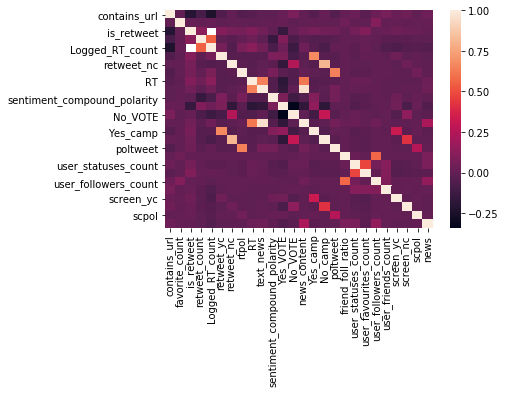

In [235]:
sns.heatmap(tweets3.corr()) #show the correlation between my variables 
plt.show()

In [236]:
corr = tweets3.corr()
corr.style.background_gradient()


/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning:

invalid value encountered in less



,contains_url,favorite_count,is_retweet,retweet_count,Logged_RT_count,retweet_yc,retweet_nc,rtpol,RT,text_news,sentiment_compound_polarity,Yes_VOTE,No_VOTE,news_content,Yes_camp,No_camp,poltweet,friend_foll_ratio,user_statuses_count,user_favourites_count,user_followers_count,user_friends_count,screen_yc,screen_nc,scpol,news
contains_url,1,-6.71037e-05,-0.208056,-0.0934928,-0.232073,-0.0578195,-0.000439309,-0.0489658,-0.0275239,-0.0112621,-0.0106737,0.0169085,0.0786009,-0.000599938,-0.0384856,0.0151644,-0.0421177,0.0071685,0.0266442,-0.0254218,0.0289445,0.0639394,0.0255101,0.035634,-0.00464512,0.0410724
favorite_count,-6.71037e-05,1,0.0106504,0.00238404,0.0113523,-0.00769417,-0.0046371,-0.00451574,-0.00718331,-0.00403429,0.00311565,0.0123348,-0.00505523,-0.00033758,0.00231979,-0.00272243,-7.711e-05,0.0362897,-0.000863839,-0.00290484,0.106539,0.00421902,0.0129547,0.00294954,0.0106352,0.0150246
is_retweet,-0.208056,0.0106504,1,0.12519,nan,0.106085,0.0639349,0.0622616,0.0990413,0.0447472,-0.0101497,-0.145228,0.0146111,0.0426695,0.0683429,0.0496303,0.0321024,0.0027281,0.0579242,0.094784,0.00952381,0.0165159,0.034737,0.0240897,0.0208676,0.00157661
retweet_count,-0.0934928,0.00238404,0.12519,1,0.552111,-0.00798156,-0.0330734,0.00298834,0.0320494,-0.0154599,-0.143015,0.0986676,-0.0727383,-0.0168679,-0.045239,-0.0408159,-0.0253467,-0.00139628,-0.00478463,0.00890959,-0.00473571,-0.0201885,-0.0254571,-0.0173259,-0.0118525,-0.0116092
Logged_RT_count,-0.232073,0.0113523,nan,0.552111,1,0.0619748,-0.0520763,0.0833029,0.120963,0.0466378,-0.0736142,0.0371751,-0.122768,0.0378128,-0.0347905,-0.0744463,0.00443202,-0.000301169,-0.0176077,0.0118621,-0.0105596,-0.0532362,-0.0670026,-0.0415386,-0.0287842,-0.0420814
retweet_yc,-0.0578195,-0.00769417,0.106085,-0.00798156,0.0619748,1,-0.0292045,-0.0259835,-0.0262203,-0.0337689,0.0855341,0.0835074,-0.0886196,-0.0351518,0.671286,-0.0335005,-0.033207,-0.00176595,-0.0175004,0.00120712,-0.0045288,-0.00705603,0.0320123,-0.015058,-0.00196009,-0.0137022
retweet_nc,-0.000439309,-0.0046371,0.0639349,-0.0330734,-0.0520763,-0.0292045,1,-0.0171402,-0.0272655,-0.0129695,-0.0205823,-0.158775,0.248386,-0.0145944,-0.0411856,0.815686,-0.0253466,-0.00112245,-0.00645934,-0.0144694,-0.00377735,-0.00373695,-0.0143473,0.0413649,-0.00498516,-0.00995796
rtpol,-0.0489658,-0.00451574,0.0622616,0.00298834,0.0833029,-0.0259835,-0.0171402,1,-0.0234572,0.00781285,0.0696299,-0.0233702,-0.0505275,0.00640189,-0.0129236,-0.0208299,0.648792,-0.00101519,-0.0157344,-0.0173449,-0.00244576,-0.00431888,-0.00663185,-0.0088376,0.0487597,-0.00525654
RT,-0.0275239,-0.00718331,0.0990413,0.0320494,0.120963,-0.0262203,-0.0272655,-0.0234572,1,0.647584,-0.0479715,-0.179204,-0.0523852,0.622912,-0.0414467,-0.0295264,-0.0247197,-0.00039392,0.0220699,0.0187075,-0.00020741,-0.00683648,-0.0140352,-0.012408,-0.00629689,0.0265627
text_news,-0.0112621,-0.00403429,0.0447472,-0.0154599,0.0466378,-0.0337689,-0.0129695,0.00781285,0.647584,1,-0.0469752,-0.15953,-0.00915651,0.961805,-0.0327134,-0.0107098,0.0580994,-8.4307e-05,0.00900416,0.00274025,0.00033228,-0.00558823,-0.00843462,-0.00430508,-0.00450534,0.0347845


In [237]:
#Convert all true-false variables into 0 1: 
tweets3['Yes_VOTE'] = tweets3.Yes_VOTE.astype(int)
tweets3['No_VOTE'] = tweets3.No_VOTE.astype(int)
tweets3['No_VOTE'] =  tweets3['No_VOTE'].apply(lambda x: x*2)
tweets3['news'] = tweets3.news.astype(int)
tweets3['news_content'] = tweets3.news_content.astype(int)
tweets3['text_news'] = tweets3.text_news.astype(int)
tweets3['screen_nc'] = tweets3.screen_nc.astype(int)
tweets3['screen_yc'] = tweets3.screen_yc.astype(int)
tweets3['retweet_nc'] = tweets3.retweet_nc.astype(int)
tweets3['retweet_yc'] = tweets3.retweet_yc.astype(int)
tweets3['scpol'] = tweets3.scpol.astype(int)
tweets3['rtpol'] = tweets3.rtpol.astype(int)
#tweets3['sentiment_type'] = tweets3['sentiment_type'].astype(int)
tweets3['contains_url'] = tweets3['contains_url'].astype(int)
tweets3['sentiment_type'].value_counts()
#change senti-type to numerical variable 

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

POSITIVE    559010
NEUTRAL     284965
NEGATIVE    239252
Name: sentiment_type, dtype: int64

In [238]:
tweets3['screen_nc'] =  tweets3['screen_nc'].apply(lambda x: x*2) #change no campaign support to 2 

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [239]:
tweets3['screen_nc'].value_counts()

0    1078182
2    5045   
Name: screen_nc, dtype: int64

In [240]:
tweets3['campaign_support'] = (tweets3.screen_yc + tweets3.screen_nc)
tweets3['campaign_support'].value_counts()

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0    1065660
1    12522  
2    5045   
Name: campaign_support, dtype: int64

In [241]:
#Combine yes vote and no vote into one supporters column
tweets3['support'] = (tweets3.Yes_VOTE + tweets3.No_VOTE)
#data_sorted['friend_foll_ratio'] = (data_sorted.user_followers_count / data_sorted.user_friends_count)
#tweets_reg = tweets4[tweets4['support']==1]
pd.set_option('display.max_colwidth', -1)

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [242]:
tweets3['support'].value_counts()
#0 = neither 
#1 = yes
#2 = no 
#3 = both 

1    646897
0    284515
2    118241
3    33574 
Name: support, dtype: int64

In [243]:
tweets3['support'] = tweets3['support'] + 1 
tweets3['support'].value_counts()
#1 = neither
#2 = yes
#3 = no 
#4 = both 

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2    646897
1    284515
3    118241
4    33574 
Name: support, dtype: int64

In [244]:
tweets4 = tweets3[tweets3['retweet_count']>0] #get rid of the tweets with 0 retweets so the log is not infinite
                
            #linear reg looks at the relationship between amount of retweets and variables 

In [245]:
tweets4['support'].value_counts()
#1 = neither 
#2 = yes
#3 = no 
#4 = both 

2    497443
1    256276
3    100306
4    25045 
Name: support, dtype: int64

In [246]:
users =  tweets3.drop_duplicates(subset=['Screenname'])

In [247]:
users['support'].value_counts() 

2    168543
1    71910 
3    12651 
4    6275  
Name: support, dtype: int64

In [248]:
tweets.shape, tweets3.shape, tweets4.shape

((1083227, 70), (1083227, 38), (879070, 38))

# LINEAR REGRESSION

In [ ]:
tweets4['is_retweet'].value_counts()
#tweets_reg.columns

In [ ]:
tweets_NEG_N = tweets4[tweets4['sentiment_compound_polarity']<=0]
tweets_POS_N = tweets4[tweets4['sentiment_compound_polarity']>=0]
tweets_NEG_POS = tweets4[tweets4['sentiment_compound_polarity']!=0]
tweets_NEG_N.shape, tweets_POS_N.shape, tweets_NEG_POS.shape

In [ ]:
tweets4.head()

In [ ]:
#Divide the data by endorsement and run separate regressions 
tweets_neither = tweets4[tweets4['support']==1]
tweets_yes = tweets4[tweets4['support']==2]
tweets_no = tweets4[tweets4['support']==3]
tweets_both = tweets4[tweets4['support']==4]
tweets_neither.shape, tweets_yes.shape, tweets_no.shape, tweets_both.shape

In [ ]:
#how many users in each 
tweets_nei_users = tweets_neither.drop_duplicates(subset='Screenname')
tweets_yes_users = tweets_yes.drop_duplicates(subset='Screenname')
tweets_no_users = tweets_no.drop_duplicates(subset='Screenname')
tweets_both_users = tweets_both.drop_duplicates(subset='Screenname')
tweets_nei_users.shape, tweets_yes_users.shape, tweets_no_users.shape, tweets_both_users.shape

In [ ]:
tweets4['sentiment_type'].value_counts()

# WITHIN THE SUBSET OF TWEETS THAT ENDORSE YES, NO, NEITHER OR BOTH CAMPAIGNS, HOW DOES SENTIMENT POLARITY AFFECT THE OUTCOME? HOW DOES A NEWS TWEET AFFECT IT? A TWEET FROM A POLITICIAN? A TWEET FROM THE YES CAMP? NO CAMP?

In [ ]:
reg_yes = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + news + scpol + screen_yc +screen_nc', data = tweets_yes).fit()
reg_yes.summary()

In [ ]:
reg_no = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + news + scpol + screen_yc +screen_nc', data = tweets_no).fit()
reg_no.summary()

In [ ]:
reg_both = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + news + scpol + screen_yc +screen_nc', data = tweets_both).fit()
reg_both.summary()

In [ ]:
reg_neither = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + news + scpol + screen_yc +screen_nc', data = tweets_neither).fit()
reg_neither.summary()

In [ ]:
reg_yes.params

In [ ]:
reg_no.params

In [ ]:
reg_both.params

In [ ]:
reg_neither.params

In [ ]:
reg2 = smf.ols(formula = 'Logged_RT_count ~ C(support)*sentiment_compound_polarity + C(news) + C(scpol) + C(screen_yc) + C(screen_nc)', data = tweets4).fit()
reg2.summary()

In [ ]:
print(reg2.params)
#1 = neither 
#2 = yes
#3 = no 
#4 = both 

In [ ]:
reg3 = smf.ols(formula = 'Logged_RT_count ~ C(support)*sentiment_type +  C(news) + C(scpol) + C(screen_yc) + C(screen_nc)', data = tweets4).fit()
reg3.summary()

In [ ]:
print(reg3.params)

In [ ]:
reg4 = smf.ols(formula = 'Logged_RT_count ~ C(support) + sentiment_compound_polarity + C(support):sentiment_compound_polarity + C(news) + C(scpol) + C(screen_yc) + C(screen_nc)', data = tweets4).fit()
reg4.summary()

In [ ]:
#interacting with just news and sentiment 
reg5 = smf.ols(formula = 'Logged_RT_count ~ C(news)*sentiment_compound_polarity + C(scpol) + C(screen_yc) + C(screen_nc) + C(support)', data=tweets4).fit()
reg5.summary()

# OLS NEWS

In [ ]:
news_df = tweets[tweets['news_content']]
news_df = news_df[news_df['retweet_count']>0] #get rid of the tweets with 0 retweets so the log is not infinite
news_df.columns

In [ ]:
#Convert all true-false variables into 0 1: 
news_df['Yes_VOTE'] = news_df.Yes_VOTE.astype(int)
news_df['No_VOTE'] = news_df.No_VOTE.astype(int)
news_df['No_VOTE'] =  news_df['No_VOTE'].apply(lambda x: x*2)
news_df['news'] = news_df.news.astype(int)
news_df['news_content'] = news_df.news_content.astype(int)
news_df['text_news'] = news_df.text_news.astype(int)
news_df['screen_nc'] = news_df.screen_nc.astype(int)
news_df['screen_yc'] = news_df.screen_yc.astype(int)
news_df['retweet_nc'] = news_df.retweet_nc.astype(int)
news_df['retweet_yc'] = news_df.retweet_yc.astype(int)
news_df['scpol'] = news_df.scpol.astype(int)
news_df['rtpol'] = news_df.rtpol.astype(int)
news_df['contains_url'] = news_df['contains_url'].astype(int)
news_df['sentiment_type'].value_counts()

In [ ]:
#Combine yes vote and no vote into one supporters column
news_df['support'] = (news_df.Yes_VOTE + news_df.No_VOTE)
pd.set_option('display.max_colwidth', -1)
news_df = news_df
news_df['support1'] = news_df['support'] + 1 
news_df['support1'].value_counts()
#1 = neither
#2 = yes
#3 = no 
#4 = both 

In [174]:
news_df['support1'].value_counts()

1    50497
2    30562
3    9256 
4    1359 
Name: support1, dtype: int64

In [167]:
#Considering all tweets that are news, what is the relationship between the retweet count 
news1 = smf.ols(formula = 'Logged_RT_count ~ C(support1)*sentiment_compound_polarity + scpol + screen_yc + screen_nc ', data = news_df).fit()
news1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Logged_RT_count   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     649.2
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:24:49   Log-Likelihood:            -2.1109e+05
No. Observations:               91674   AIC:                         4.222e+05
Df Residuals:                   91663   BIC:                         4.223e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        4.6755      0.011    408.934      0.000       4.653       4.698
C(support1)[T.2]                                -0.9237      0.019    -49.278      0.000      -0.960      -0.887
C(support1)[T.3]                                -0.8575      0.028    -30.824      0.000      -0.912      -0.803
C(support1)[T.4]                                -2.8706      0.067    -43.004      0.000      -3.001      -2.740
sentiment_compound_polarity                     -0.4254      0.033    -12.941      0.000      -0.490      -0.361
C(support1)[T.2]:sentiment_compound_polarity    -0.2083      0.046     -4.499      0.000      -0.299      -0.118
C(support1)[T.3]:sentiment_compound_polarity    -1.0019      0.066    -15.262      0.000      -1.131      -0.873
C(support1)[T.4]:sentiment_compound_polarity     0.4229      0.147      2.876      0.004       0.135       0.711
scpol                                           -1.2743      0.167     -7.639      0.000      -1.601      -0.947
screen_yc                                       -1.2610      0.081    -15.599      0.000      -1.419      -1.103
screen_nc                                       -1.3327      0.130    -10.238      0.000      -1.588      -1.078
==============================================================================
Omnibus:                    20192.608   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3766.767
Skew:                           0.022   Prob(JB):                         0.00
Kurtosis:                       2.008   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
#Divide the data by endorsement and run separate regressions 
news_neither = news_df[news_df['support1']==1]
news_yes = news_df[news_df['support1']==2]
news_no = news_df[news_df['support1']==3]
news_both = news_df[news_df['support1']==4]
news_neither.shape, news_yes.shape, news_no.shape, news_both.shape

((50497, 74), (30562, 74), (9256, 74), (1359, 74))

In [176]:
news_yes = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + scpol + screen_yc +screen_nc', data = news_yes).fit()
news_yes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Logged_RT_count   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 26 Aug 2018   Prob (F-statistic):          3.30e-139
Time:                        22:25:41   Log-Likelihood:                -68090.
No. Observations:               30562   AIC:                         1.362e+05
Df Residuals:                   30557   BIC:                         1.362e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.7487      0.014    270.078      0.000       3.722       3.776
sentiment_compound_polarity    -0.6350      0.030    -20.985      0.000      -0.694      -0.576
scpol                          -0.8672      0.223     -3.893      0.000      -1.304      -0.431
screen_yc                      -1.1807      0.088    -13.406      0.000      -1.353      -1.008
screen_nc                      -1.1665      0.441     -2.647      0.008      -2.030      -0.303
==============================================================================
Omnibus:                     5104.241   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.306
Skew:                           0.007   Prob(JB):                    1.19e-244
Kurtosis:                       2.061   Cond. No.                         34.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
news_no = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + scpol + screen_yc +screen_nc', data = news_no).fit()
news_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Logged_RT_count   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 26 Aug 2018   Prob (F-statistic):          1.89e-157
Time:                        22:25:42   Log-Likelihood:                -21075.
No. Observations:                9256   AIC:                         4.216e+04
Df Residuals:                    9251   BIC:                         4.220e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.8165      0.025    153.409      0.000       3.768       3.865
sentiment_compound_polarity    -1.4271      0.055    -25.754      0.000      -1.536      -1.318
scpol                          -1.4225      0.631     -2.254      0.024      -2.659      -0.186
screen_yc                       1.1439      0.963      1.187      0.235      -0.745       3.032
screen_nc                      -1.3270      0.154     -8.628      0.000      -1.628      -1.025
==============================================================================
Omnibus:                     2700.276   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.547
Skew:                          -0.025   Prob(JB):                     2.90e-92
Kurtosis:                       1.956   Cond. No.                         39.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
news_neither = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + scpol + screen_yc +screen_nc', data = news_neither).fit()
news_yes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Logged_RT_count   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     164.1
Date:                Sun, 26 Aug 2018   Prob (F-statistic):          3.30e-139
Time:                        22:25:43   Log-Likelihood:                -68090.
No. Observations:               30562   AIC:                         1.362e+05
Df Residuals:                   30557   BIC:                         1.362e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.7487      0.014    270.078      0.000       3.722       3.776
sentiment_compound_polarity    -0.6350      0.030    -20.985      0.000      -0.694      -0.576
scpol                          -0.8672      0.223     -3.893      0.000      -1.304      -0.431
screen_yc                      -1.1807      0.088    -13.406      0.000      -1.353      -1.008
screen_nc                      -1.1665      0.441     -2.647      0.008      -2.030      -0.303
==============================================================================
Omnibus:                     5104.241   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.306
Skew:                           0.007   Prob(JB):                    1.19e-244
Kurtosis:                       2.061   Cond. No.                         34.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
news_both = smf.ols(formula = 'Logged_RT_count ~ sentiment_compound_polarity + scpol + screen_yc +screen_nc', data = news_both).fit()
news_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Logged_RT_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1412
Date:                Sun, 26 Aug 2018   Prob (F-statistic):              0.967
Time:                        22:25:43   Log-Likelihood:                -2679.8
No. Observations:                1359   AIC:                             5370.
Df Residuals:                    1354   BIC:                             5396.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.7736      0.048     37.106      0.000       1.680       1.867
sentiment_compound_polarity    -0.0235      0.103     -0.227      0.820      -0.226       0.179
scpol                           1.0430      1.744      0.598      0.550      -2.378       4.464
screen_yc                       0.1723      1.742      0.099      0.921      -3.245       3.590
screen_nc                       0.1291      0.339      0.381      0.704      -0.536       0.794
==============================================================================
Omnibus:                      509.654   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1939.254
Skew:                           1.810   Prob(JB):                         0.00
Kurtosis:                       7.598   Cond. No.                         36.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# IRELAND Regression

In [183]:
#location_filtering
Ireland=tweets4[tweets4['user_location'].str.contains('Ireland|Munster|Connacht|Ulster|Antrim|Armagh|Carlow|Cavan|Clare|Cork|Derry|Donegal|Down|Dublin|Fermanagh|Galway|Kerry|Kildare|Kilkenny|Laois|Leitrim|Limerick|Longford|Louth|Mayo|Meath|Monaghan|Offaly|Roscommon|Sligo|Tipperary|Tyrone|Waterford|Westmeath|Wexford|Wicklow',case=False)==True]
print(Ireland.shape)

(343098, 38)


In [181]:
tweets4['support'].value_counts()

2    497443
1    256276
3    100306
4    25045 
Name: support, dtype: int64

In [182]:
reg4 = smf.ols(formula = 'Logged_RT_count ~ C(support)*sentiment_compound_polarity + C(news) + C(scpol) + C(screen_yc) + C(screen_nc)', data = Ireland).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Logged_RT_count   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     939.3
Date:                Sun, 26 Aug 2018   Prob (F-statistic):               0.00
Time:                        22:26:07   Log-Likelihood:            -7.5343e+05
No. Observations:              343098   AIC:                         1.507e+06
Df Residuals:                  343086   BIC:                         1.507e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       3.6132      0.008    472.654      0.000       3.598       3.628
C(support)[T.2]                                -0.3978      0.009    -42.096      0.000      -0.416      -0.379
C(support)[T.3]                                -0.9853      0.014    -70.893      0.000      -1.013      -0.958
C(support)[T.4]                                -1.0519      0.025    -42.747      0.000      -1.100      -1.004
C(news)[T.1]                                   -1.5331      0.038    -39.966      0.000      -1.608      -1.458
C(scpol)[T.1]                                  -0.7288      0.043    -16.963      0.000      -0.813      -0.645
C(screen_yc)[T.1]                              -0.9029      0.023    -40.065      0.000      -0.947      -0.859
C(screen_nc)[T.2]                              -0.3216      0.037     -8.794      0.000      -0.393      -0.250
sentiment_compound_polarity                     0.1206      0.017      7.167      0.000       0.088       0.154
C(support)[T.2]:sentiment_compound_polarity    -0.1736      0.020     -8.558      0.000      -0.213      -0.134
C(support)[T.3]:sentiment_compound_polarity    -0.1660      0.029     -5.733      0.000      -0.223      -0.109
C(support)[T.4]:sentiment_compound_polarity    -0.3200      0.056     -5.764      0.000      -0.429      -0.211
==============================================================================
Omnibus:                    15104.282   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14159.213
Skew:                           0.446   Prob(JB):                         0.00
Kurtosis:                       2.558   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Average Share RT yes UPDATE  

In [374]:
#Get all RETWEETS that are endorsing the yes campaign from regression data  
tweets_yesRT = tweets_yes[tweets_yes['is_retweet']]
tweets_yes.shape

(497443, 38)

In [ ]:
tweets_yes_negative2 = tweets_yes[tweets_yes['sentiment_type'].str.contains('NEGATIVE')==True]
tweets_yes_positive2 = tweets_yesRT[tweets_yes['sentiment_type'].str.contains('POSITIVE')==True]
tweets_yes_neutral2 = tweets_yesRT[tweets_yes['sentiment_type'].str.contains('NEUTRAL')==True]

In [185]:
#divide these retweets by sentiment 
tweets_yes_negative = tweets_yesRT[tweets_yesRT['sentiment_type'].str.contains('NEGATIVE')==True]
tweets_yes_positive = tweets_yesRT[tweets_yesRT['sentiment_type'].str.contains('POSITIVE')==True]
tweets_yes_neutral = tweets_yesRT[tweets_yesRT['sentiment_type'].str.contains('NEUTRAL')==True]

In [186]:
#How many are there? 

In [187]:
#Proportion of tweets that are positive and supporting YES
tweets_yes_positive.shape, tweets_yesRT.shape

((263769, 38), (497443, 38))

In [188]:
#Proportion of tweets that are negative and supporting YES
tweets_yes_neutral.shape, tweets_yesRT.shape

((137199, 38), (497443, 38))

In [189]:
#Proportion of tweets that are neutral and supporting YES
tweets_yes_negative.shape, tweets_yesRT.shape #

((96475, 38), (497443, 38))

In [190]:
#27.1% neutral ; 20% negative ; 52.8% positive

# Average share RT no UPDATE

In [191]:
#Get all RETWEETS that are endorsing the no campaign from above
tweets_noRT = tweets_no[tweets_no['is_retweet']]
tweets_no.shape

(100306, 38)

In [192]:
#Get all RETWEETS that are endorsing the yes campaign 
tweets_no_negative = tweets_noRT[tweets_noRT['sentiment_type'].str.contains('NEGATIVE')==True]
tweets_no_positive = tweets_noRT[tweets_noRT['sentiment_type'].str.contains('POSITIVE')==True]
tweets_no_neutral = tweets_noRT[tweets_noRT['sentiment_type'].str.contains('NEUTRAL')==True]

In [193]:
#Proportion of tweets that are positive and supporting NO
tweets_no_positive.shape, tweets_noRT.shape

((42963, 38), (100306, 38))

In [194]:
#Proportion of tweets that are negative and supporting NO
tweets_no_neutral.shape, tweets_noRT.shape

((25788, 38), (100306, 38))

In [195]:
#Proportion of tweets that are neutral and supporting NO
tweets_no_negative.shape, tweets_noRT.shape

((31555, 38), (100306, 38))

In [196]:
#24.2% neutral ; 30.7% negative ; 45.0% positive

# Analysis of  All Tweets 

# Distribution of Retweet Count by Endorsement 

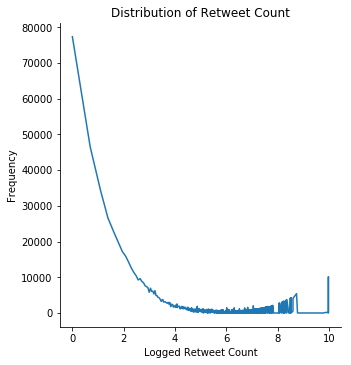

In [197]:
freq_RT = pd.DataFrame(tweets4['Logged_RT_count'].value_counts().reset_index())
FRT = sns.relplot(x='index',y='Logged_RT_count',data = freq_RT, kind="line",markers = True)
FRT.set(xlabel = 'Logged Retweet Count', ylabel = 'Frequency')
FRT = plt.title("Distribution of Retweet Count")

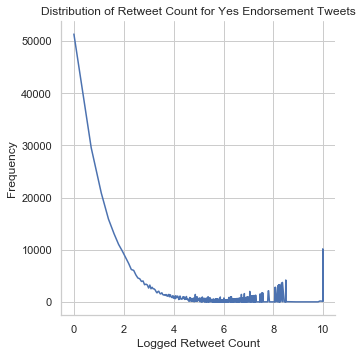

In [326]:
freq_RT_Y = pd.DataFrame(tweets_yes['Logged_RT_count'].value_counts().reset_index())
FRTY = sns.relplot(x='index',y='Logged_RT_count',data = freq_RT_Y, kind="line",markers = True)
FRTY.set(xlabel = 'Logged Retweet Count', ylabel = 'Frequency')
FRTY = plt.title("Distribution of Retweet Count for Yes Endorsement Tweets")
FRTY = plt.ylim(0,80000)

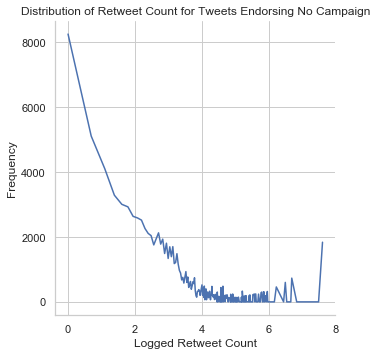

In [327]:
RT_dis_N = pd.DataFrame(tweets_no['Logged_RT_count'].value_counts().reset_index())
FRTN = sns.relplot(x='index',y='Logged_RT_count',data = RT_dis_N, kind="line",markers = True)
FRTN.set(xlabel = 'Logged Retweet Count', ylabel = 'Frequency')
FRTN = plt.title("Distribution of Retweet Count for Tweets Endorsing No Campaign")

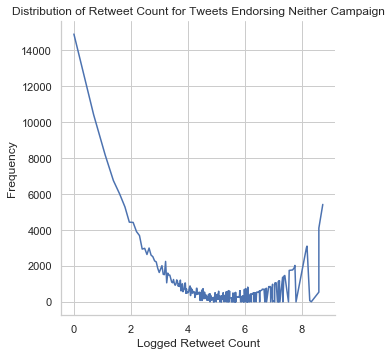

In [328]:
RT_dis_Neither = pd.DataFrame(tweets_neither['Logged_RT_count'].value_counts().reset_index())
FRTNei = sns.relplot(x='index',y='Logged_RT_count',data = RT_dis_Neither, kind="line",markers = True)
FRTNei.set(xlabel = 'Logged Retweet Count', ylabel = 'Frequency')
FRTNei = plt.title("Distribution of Retweet Count for Tweets Endorsing Neither Campaign")

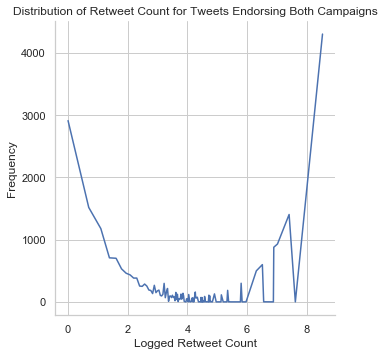

In [329]:
RT_dis_both = pd.DataFrame(tweets_both['Logged_RT_count'].value_counts().reset_index())
FRTB = sns.relplot(x='index',y='Logged_RT_count',data = RT_dis_both, kind="line",markers = True)
FRTB.set(xlabel = 'Logged Retweet Count', ylabel = 'Frequency')
FRTB = plt.title("Distribution of Retweet Count for Tweets Endorsing Both Campaigns")

In [205]:
bothsupport = tweets4[tweets4['support']==4]
bothsupport.sort_values(by=['retweet_count'],ascending=False)

,DATE,TIME,hashtags,urls,contains_url,favorite_count,is_retweet,retweet_count,Logged_RT_count,retweet_screen_name,retweet_yc,retweet_nc,rtpol,RT,text,text_news,sentiment_compound_polarity,sentiment_type,Yes_VOTE,No_VOTE,news_content,Yes_camp,No_camp,poltweet,friend_foll_ratio,user_statuses_count,user_location,Screenname,user_description,user_favourites_count,user_followers_count,user_friends_count,screen_yc,screen_nc,scpol,news,campaign_support,support
816610,2018-05-26,00:11:35,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.437870,147,The World,xenia_levantis,Trained Surface Designer & Printmaker working in student politics. OfS student panel member. Ex-President @NUAStudentsUnion & Chair of @GuildHE SU Network,577,148,338,0,0,0,0,0,4
742260,2018-05-25,21:15:45,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.404321,106886,NaN,Anthony689908,"offended by nothing, ashamed by everything. 🇾🇪 mufc ok",20791,393,972,0,0,0,0,0,4
741930,2018-05-25,21:15:23,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.228200,14119,United Kingdom,BluePenguinUK,NaN,20502,123,539,0,0,0,0,0,4
808641,2018-05-25,23:34:31,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.741573,7452,Glasgow,3lsp3th,UofG Law (barely),6283,465,267,0,0,0,0,0,4
808546,2018-05-25,23:34:27,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.978095,10616,"Dublin,Ireland",sue1187,Dreaming under the stars..🇮🇪 . . . . . . . . . . . . Instagram /sue1187,9736,4108,4200,0,0,0,0,0,4
933711,2018-05-26,12:08:25,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.184510,86019,"Chicago, IL",SJTrainer2,Just a person on Twitter who has a thing for Pokémon and comedy. I see nothing wrong with that.,97164,162,878,0,0,0,0,0,4
933766,2018-05-26,12:08:25,"Referendum2018 , repealthe8

In [202]:
sent_dist = pd.DataFrame(tweets4['sentiment_compound_polarity'].value_counts().reset_index())
sent_dist

,index,sentiment_compound_polarity
0,0.0000,241610
1,-0.3182,22932
2,0.4019,22781
3,0.1280,20108
4,-0.2960,15054
5,0.4404,13463
6,0.5319,9447
7,0.4215,9001
8,0.3612,8949
9,0.3182,8215


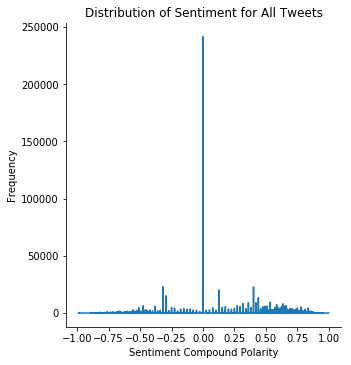

In [203]:
SD = sns.relplot(x='index',y='sentiment_compound_polarity',data = sent_dist, kind="line",markers = True)
SD.set(xlabel = 'Sentiment Compound Polarity', ylabel = 'Frequency')
SD = plt.title("Distribution of Sentiment for All Tweets")

# Network of Campaign Retweets 

In [211]:
tweets3['screen_nc'].value_counts()

0    1078182
2    5045   
Name: screen_nc, dtype: int64

In [212]:
tweets3['camp_total'] = (tweets3.screen_nc + tweets.screen_yc)
no = tweets3[tweets3['screen_nc']==2]
tweets3['camp_total'].value_counts()

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0    1065660
1    12522  
2    5045   
Name: camp_total, dtype: int64

In [213]:
campaign_data = tweets3[tweets3['camp_total']>=1]

In [214]:
campaign_data['camp_total'].value_counts() 

1    12522
2    5045 
Name: camp_total, dtype: int64

In [215]:
retweets = campaign_data[campaign_data['is_retweet']]
retweets['original_twitter'] = retweets['text'].str.extract('RT @([a-zA-Z0-9]\w{0,}):', expand=True)
retweets.columns

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['DATE', 'TIME', 'hashtags', 'urls', 'contains_url', 'favorite_count',
       'is_retweet', 'retweet_count', 'Logged_RT_count', 'retweet_screen_name',
       'retweet_yc', 'retweet_nc', 'rtpol', 'RT', 'text', 'text_news',
       'sentiment_compound_polarity', 'sentiment_type', 'Yes_VOTE', 'No_VOTE',
       'news_content', 'Yes_camp', 'No_camp', 'poltweet', 'friend_foll_ratio',
       'user_statuses_count', 'user_location', 'Screenname',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'screen_yc', 'screen_nc', 'scpol', 'news',
       'campaign_support', 'support', 'camp_total', 'original_twitter'],
      dtype='object')

In [216]:
edges = retweets[['Screenname', 'original_twitter','DATE']]
edges.columns = ['Source', 'Target', 'Strength']

In [217]:
strengthLevel = 1  # Network connection strength level: the number of times in total each of the tweeters RTed the other
# If you have 1 as the level, then all tweeters who mentioned or replied to another at least once will be displayed. But if you have 5, only those who have mentioned or responded to a particular tweeter at least 5 times will be displayed, which means that only the strongest bonds are shown.
edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2.head = edges2[edges2['Strength'] >= strengthLevel]

In [218]:
users = campaign_data[['Screenname','user_followers_count','screen_yc','screen_nc']]
users = users.sort_values(['Screenname','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['Screenname'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['Screenname', 'Label']
ids = ids.drop_duplicates(['Screenname'], keep='first') 
nodes = pd.merge(ids, users, on='Screenname', how='left')


In [219]:
print(nodes.shape) #user-based data
print(edges2.shape)#tweet-based data
#(213390, 7)
#(558796, 3)

(2192, 5)
(4570, 3)


In [221]:
nodes.head()

,Screenname,Label,user_followers_count,screen_yc,screen_nc
0,1familyireland,1familyireland,2741.0,1.0,0.0
1,AIMSIreland,AIMSIreland,3975.0,1.0,0.0
2,ARCDonegal,ARCDonegal,1381.0,1.0,0.0
3,ARNirl,ARNirl,3271.0,1.0,0.0
4,Abortion_RCScot,Abortion_RCScot,793.0,1.0,0.0


In [238]:
edges2

,Source,Target,Strength
0,BrendanHowlin,BrianODriscoll,1
1,BrendanHowlin,BridinM,1
2,BrendanHowlin,DawnButlerBrent,1
3,BrendanHowlin,DrMarkMurphy,1
4,BrendanHowlin,Together4yes,1
5,BrendanHowlin,ivanabacik,1
6,BrendanHowlin,labour,14
7,CathMurphyTD,1GaryGannon,2
8,CathMurphyTD,1KenCampbell,3
9,CathMurphyTD,AnMailleach,1


In [222]:
nodes.to_csv('campaign_tweetsnodes.csv', encoding='utf-8', index=False)
edges2.to_csv('campaign_tweets.csv', encoding='utf-8', index=False)

In [348]:
campaign_data.shape

(17567, 39)

# Campaign Network (Including Mentions and Retweets)

In [351]:
tweets3['Yes_camp'].value_counts()

False    986795
True      96432
Name: Yes_camp, dtype: int64

In [352]:
tweets3['camp_total2'] = (tweets3.Yes_camp + tweets.No_camp)
no = tweets3[tweets3['No_camp']==2]
tweets3['camp_total2'].value_counts()

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    959382
True     123845
Name: camp_total2, dtype: int64

In [360]:
campaign_data2 = tweets3[tweets3['camp_total2']>=1]

In [361]:
campaign_data2['camp_total'].value_counts() 

0    115018
2      5045
1      3782
Name: camp_total, dtype: int64

In [362]:
retweets = campaign_data2[campaign_data2['is_retweet']]
retweets['original_twitter'] = retweets['text'].str.extract('RT @([a-zA-Z0-9]\w{0,}):', expand=True)
retweets.columns

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['DATE', 'TIME', 'hashtags', 'urls', 'contains_url', 'favorite_count',
       'is_retweet', 'retweet_count', 'Logged_RT_count', 'retweet_screen_name',
       'retweet_yc', 'retweet_nc', 'rtpol', 'RT', 'text', 'text_news',
       'sentiment_compound_polarity', 'sentiment_type', 'Yes_VOTE', 'No_VOTE',
       'news_content', 'Yes_camp', 'No_camp', 'poltweet', 'friend_foll_ratio',
       'user_statuses_count', 'user_location', 'Screenname',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'screen_yc', 'screen_nc', 'scpol', 'news',
       'campaign_support', 'support', 'camp_total', 'camp_total2',
       'original_twitter'],
      dtype='object')

In [363]:
edges = retweets[['Screenname', 'original_twitter','DATE']]
edges.columns = ['Source', 'Target', 'Strength']

In [364]:
strengthLevel = 1  # Network connection strength level: the number of times in total each of the tweeters RTed the other
# If you have 1 as the level, then all tweeters who mentioned or replied to another at least once will be displayed. But if you have 5, only those who have mentioned or responded to a particular tweeter at least 5 times will be displayed, which means that only the strongest bonds are shown.
edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2.head = edges2[edges2['Strength'] >= strengthLevel]

In [365]:
users = campaign_data2[['Screenname','user_followers_count','screen_yc','screen_nc']]
users = users.sort_values(['Screenname','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['Screenname'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['Screenname', 'Label']
ids = ids.drop_duplicates(['Screenname'], keep='first') 
nodes = pd.merge(ids, users, on='Screenname', how='left')


In [366]:
print(nodes.shape) #user-based data
print(edges2.shape)#tweet-based data
#(213390, 7)
#(558796, 3)

(28107, 5)
(59932, 3)


In [367]:
nodes.head()

,Screenname,Label,user_followers_count,screen_yc,screen_nc
0,000120o,000120o,3632.0,0.0,0.0
1,00MadHatter,00MadHatter,85.0,0.0,0.0
2,01adele1,01adele1,77.0,0.0,0.0
3,05026024,05026024,7.0,0.0,0.0
4,05redlizzie,05redlizzie,155.0,0.0,0.0


In [368]:
edges2

,Source,Target,Strength
0,000120o,DiEM_25,1
1,000120o,RosaWomen,1
2,00MadHatter,Together4yes,1
3,01adele1,TFMRIRE,1
4,05026024,RosForChoice,1
5,05redlizzie,westcork4choice,1
6,0879Teresa,Together4yes,1
7,0899mc,LdnIrishU4L,1
8,0899mc,loveboth8,6
9,0Calamity,DaniS1006,1


In [369]:
nodes.to_csv('campaign_tweetsrtmennodes.csv', encoding='utf-8', index=False)
edges2.to_csv('campaign_tweetsrtmen.csv', encoding='utf-8', index=False)

In [371]:
campaign_data2.shape

(123845, 40)

# Network of Politicians 

In [256]:
pol_data = tweets3[tweets3['scpol']==1]
pol_data.columns

Index(['DATE', 'TIME', 'hashtags', 'urls', 'contains_url', 'favorite_count',
       'is_retweet', 'retweet_count', 'Logged_RT_count', 'retweet_screen_name',
       'retweet_yc', 'retweet_nc', 'rtpol', 'RT', 'text', 'text_news',
       'sentiment_compound_polarity', 'sentiment_type', 'Yes_VOTE', 'No_VOTE',
       'news_content', 'Yes_camp', 'No_camp', 'poltweet', 'friend_foll_ratio',
       'user_statuses_count', 'user_location', 'Screenname',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'screen_yc', 'screen_nc', 'scpol', 'news',
       'campaign_support', 'support', 'camp_total'],
      dtype='object')

In [224]:
retweets = pol_data[pol_data['is_retweet']]
retweets['original_twitter'] = retweets['text'].str.extract('RT @([a-zA-Z0-9]\w{0,}):', expand=True)
retweets.columns

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['DATE', 'TIME', 'hashtags', 'urls', 'contains_url', 'favorite_count',
       'is_retweet', 'retweet_count', 'Logged_RT_count', 'retweet_screen_name',
       'retweet_yc', 'retweet_nc', 'rtpol', 'RT', 'text', 'text_news',
       'sentiment_compound_polarity', 'sentiment_type', 'Yes_VOTE', 'No_VOTE',
       'news_content', 'Yes_camp', 'No_camp', 'poltweet', 'friend_foll_ratio',
       'user_statuses_count', 'user_location', 'Screenname',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'screen_yc', 'screen_nc', 'scpol', 'news',
       'campaign_support', 'support', 'camp_total', 'original_twitter'],
      dtype='object')

In [225]:
edges = retweets[['Screenname', 'original_twitter','DATE']]
edges.columns = ['Source', 'Target', 'Strength']

In [226]:
strengthLevel = 1  # Network connection strength level: the number of times in total each of the tweeters RTed the other
# If you have 1 as the level, then all tweeters who mentioned or replied to another at least once will be displayed. But if you have 5, only those who have mentioned or responded to a particular tweeter at least 5 times will be displayed, which means that only the strongest bonds are shown.
edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2.head = edges2[edges2['Strength'] >= strengthLevel]

In [227]:
users = pol_data[['Screenname','user_followers_count','support','news_content','sentiment_type']]
users = users.sort_values(['Screenname','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['Screenname'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['Screenname', 'Label']
ids = ids.drop_duplicates(['Screenname'], keep='first') 
nodes = pd.merge(ids, users, on='Screenname', how='left')

In [228]:
print(nodes.shape) #user-based data
print(edges2.shape)#tweet-based data

(571, 6)
(854, 3)


In [240]:
edges2.head

,Source,Target,Strength
0,BrendanHowlin,BrianODriscoll,1
1,BrendanHowlin,BridinM,1
2,BrendanHowlin,DawnButlerBrent,1
3,BrendanHowlin,DrMarkMurphy,1
4,BrendanHowlin,Together4yes,1
5,BrendanHowlin,ivanabacik,1
6,BrendanHowlin,labour,14
7,CathMurphyTD,1GaryGannon,2
8,CathMurphyTD,1KenCampbell,3
9,CathMurphyTD,AnMailleach,1


In [242]:
nodes.head()

,Screenname,Label,user_followers_count,support,news_content,sentiment_type
0,BrendanHowlin,BrendanHowlin,3672.0,2.0,1.0,POSITIVE
1,CathMurphyTD,CathMurphyTD,17675.0,2.0,0.0,POSITIVE
2,EamonRyan,EamonRyan,21285.0,2.0,0.0,POSITIVE
3,FineGaelBrux,FineGaelBrux,173.0,1.0,1.0,POSITIVE
4,JoeHigginsSP,JoeHigginsSP,20310.0,2.0,0.0,POSITIVE


In [243]:
nodes.to_csv('poltweetnodes.csv', encoding='utf-8', index=False)
edges2.to_csv('poledges.csv', encoding='utf-8', index=False)

# News Network 

In [244]:
users_news = tweets3[tweets3['news']==1]
users_news.shape

(6183, 39)

In [245]:
retweets = users_news[users_news['is_retweet']]
retweets['original_twitter'] = retweets['text'].str.extract('RT @([a-zA-Z0-9]\w{0,}):', expand=True)
retweets.columns

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['DATE', 'TIME', 'hashtags', 'urls', 'contains_url', 'favorite_count',
       'is_retweet', 'retweet_count', 'Logged_RT_count', 'retweet_screen_name',
       'retweet_yc', 'retweet_nc', 'rtpol', 'RT', 'text', 'text_news',
       'sentiment_compound_polarity', 'sentiment_type', 'Yes_VOTE', 'No_VOTE',
       'news_content', 'Yes_camp', 'No_camp', 'poltweet', 'friend_foll_ratio',
       'user_statuses_count', 'user_location', 'Screenname',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'screen_yc', 'screen_nc', 'scpol', 'news',
       'campaign_support', 'support', 'camp_total', 'original_twitter'],
      dtype='object')

In [246]:
edges = retweets[['Screenname', 'original_twitter','DATE']]
edges.columns = ['Source', 'Target', 'Strength']

In [247]:
strengthLevel = 1  # Network connection strength level: the number of times in total each of the tweeters RTed the other
# If you have 1 as the level, then all tweeters who mentioned or replied to another at least once will be displayed. But if you have 5, only those who have mentioned or responded to a particular tweeter at least 5 times will be displayed, which means that only the strongest bonds are shown.
edges2 = edges.groupby(['Source','Target'])['Strength'].count()
edges2 = edges2.reset_index()
edges2.head = edges2[edges2['Strength'] >= strengthLevel]

In [248]:
users = users_news[['Screenname','user_followers_count','news','screen_yc','screen_nc','scpol']]
users = users.sort_values(['Screenname','user_followers_count'], ascending=[True, False])
users = users.drop_duplicates(['Screenname'], keep='first') 

ids = edges2['Source'].append(edges2['Target']).to_frame()
ids['Label'] = ids
ids.columns = ['Screenname', 'Label']
ids = ids.drop_duplicates(['Screenname'], keep='first') 
nodes = pd.merge(ids, users, on='Screenname', how='left')

In [249]:
print(nodes.shape) #user-based data
print(edges2.shape)#tweet-based data
#(213390, 7)
#(558796, 3)

(1240, 7)
(1577, 3)


In [250]:
edges2.head

,Source,Target,Strength
0,1395FIVEaa,FIVEaaBreakfast,1
1,345triangle,MorabitoCM,1
2,3NewsIreland,ericgclarke,1
3,3NewsIreland,gavreilly,2
4,5_News,tessa5news,1
5,AMTomchak,gavreilly,1
6,AMTomchak,pollycurtis,1
7,AaronMehta,britainelects,1
8,AilbheConneely,Dyaneconnor,1
9,AilbheConneely,morningireland,1


In [251]:
nodes.head(4)

,Screenname,Label,user_followers_count,news,screen_yc,screen_nc,scpol
0,1395FIVEaa,1395FIVEaa,34441.0,1.0,0.0,0.0,0.0
1,345triangle,345triangle,7360.0,1.0,0.0,0.0,0.0
2,3NewsIreland,3NewsIreland,38562.0,1.0,0.0,0.0,0.0
3,5_News,5_News,20901.0,1.0,0.0,0.0,0.0


In [252]:
nodes.to_csv('newsnodes.csv', encoding='utf-8', index=False)
edges2.to_csv('newsedges.csv', encoding='utf-8', index=False)

# Summary of Data

In [253]:
#how many retweets in the dataset
tweets3['is_retweet'].value_counts()

True     879070
False    204157
Name: is_retweet, dtype: int64

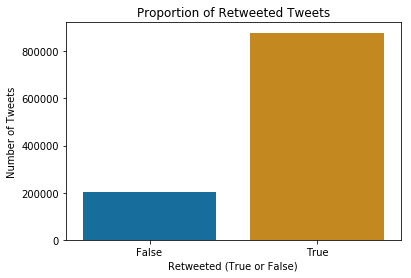

In [254]:
ax = sns.countplot(x='is_retweet', data= tweets3, palette = 'colorblind')
ax.set(xlabel = 'Retweeted (True or False)', ylabel = 'Number of Tweets')
ax = plt.title("Proportion of Retweeted Tweets")
plt.show()

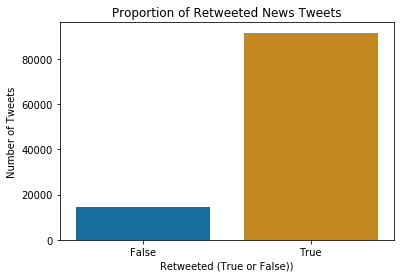

In [255]:
ax = sns.countplot(x='is_retweet', data= news_data, palette = 'colorblind')
ax.set(xlabel = 'Retweeted (True or False))', ylabel = 'Number of Tweets')
ax = plt.title("Proportion of Retweeted News Tweets")

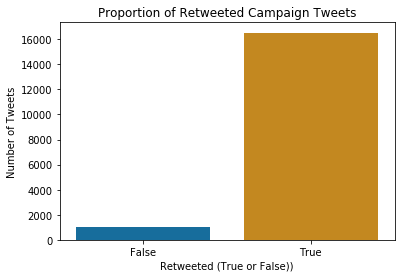

In [257]:
ax = sns.countplot(x='is_retweet', data= campaign_data, palette = 'colorblind')
ax.set(xlabel = 'Retweeted (True or False))', ylabel = 'Number of Tweets')
ax = plt.title("Proportion of Retweeted Campaign Tweets")

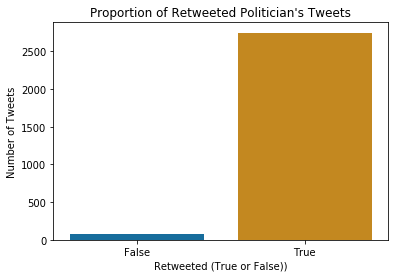

In [258]:
ax = sns.countplot(x='is_retweet', data= pol_data, palette = 'colorblind')
ax.set(xlabel = 'Retweeted (True or False))', ylabel = 'Number of Tweets')
ax = plt.title("Proportion of Retweeted Politician's Tweets")

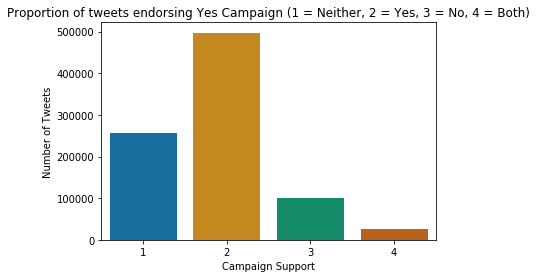

In [259]:
ax2 = sns.countplot(x='support', data= tweets4, palette = 'colorblind')
ax2.set(xlabel = 'Campaign Support', ylabel = 'Number of Tweets')
ax2 = plt.title("Proportion of tweets endorsing Yes Campaign (1 = Neither, 2 = Yes, 3 = No, 4 = Both)")

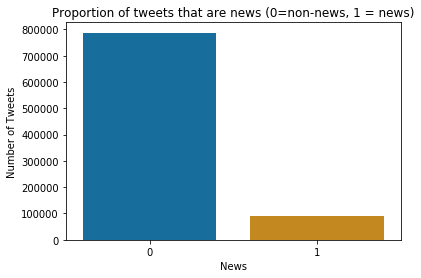

In [260]:
ax2 = sns.countplot(x='news_content', data= tweets4, palette = 'colorblind')
ax2.set(xlabel = 'News', ylabel = 'Number of Tweets')
ax2 = plt.title("Proportion of tweets that are news (0=non-news, 1 = news)")

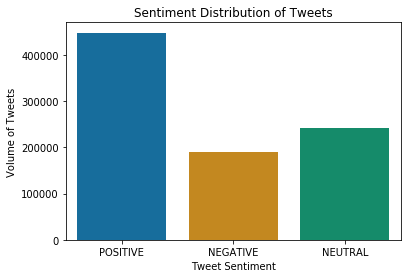

In [261]:
ax3 = sns.countplot(x='sentiment_type', data= tweets4, palette = 'colorblind')
ax3.set(xlabel = 'Tweet Sentiment', ylabel = 'Volume of Tweets')
ax3 = plt.title("Sentiment Distribution of Tweets")

In [335]:
dates = pd.DataFrame(tweets3['DATE'].value_counts().reset_index())
dates.columns = dates.columns.str.replace('index','Date') #Renaming two of the columns 
dates.columns = dates.columns.str.replace('DATE','Frequency')
dates = dates.sort_values(by=['Date'])
dates.head(5)

,Date,Frequency
49,2018-04-13,3718
43,2018-04-14,5810
44,2018-04-15,5782
45,2018-04-16,5433
42,2018-04-17,6371


(array([736799., 736806., 736813., 736820., 736827., 736834., 736841.,
        736848.]), <a list of 8 Text xticklabel objects>)

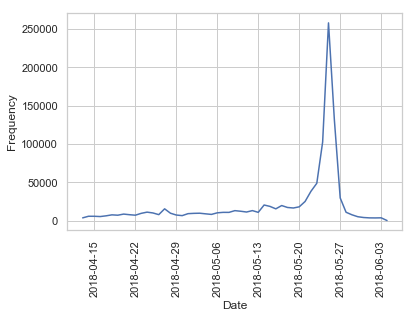

In [336]:
volumeover_time = sns.lineplot(x=dates.Date, y=dates.Frequency)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xticks(rotation=90)

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Tweet Sentiment From 13-04-2018 to 04-06-2018')

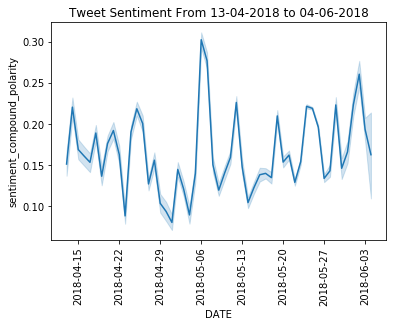

In [264]:
#Show the sentiment distribution based on sentiment_compound_polarity OVER TIME 
H = sns.lineplot(x=tweets3.DATE, y=tweets3.sentiment_compound_polarity, data=tweets3)
plt.xticks(rotation=90)
H.set_title('Tweet Sentiment From 13-04-2018 to 04-06-2018')

In [265]:
palette = sns.color_palette("mako_r", 4)

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Tweet Sentiment From 13-04-2018 to 04-06-2018 by Support')

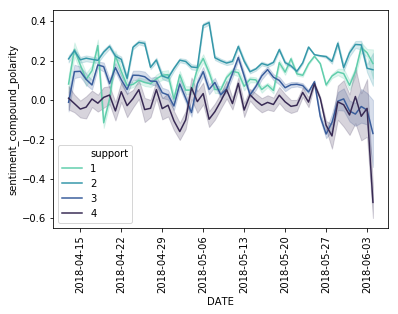

In [266]:
g = sns.lineplot(x=tweets3.DATE, y=tweets3.sentiment_compound_polarity, hue = tweets3.support, palette = palette)
plt.xticks(rotation=90)
H.set_title('Tweet Sentiment From 13-04-2018 to 04-06-2018 by Support')

In [267]:
palette = sns.color_palette("mako_r", 2)

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Tweet Sentiment From 13-04-2018 to 04-06-2018 by News')

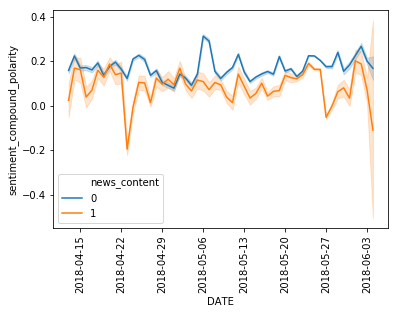

In [268]:
gn = sns.lineplot(x=tweets3.DATE, y=tweets3.sentiment_compound_polarity, hue = tweets3.news_content)
plt.xticks(rotation=90)
H.set_title('Tweet Sentiment From 13-04-2018 to 04-06-2018 by News')

# Analysis of YES Supporters Tweets

In [269]:
tweets_yes.shape

(497443, 38)

In [270]:
tweets_yes['news'].value_counts()

0    495929
1    1514  
Name: news, dtype: int64

In [271]:
users_yes = tweets_yes.drop_duplicates(subset='Screenname')
users_yes.shape

(159986, 38)

In [272]:
Sentiment_tweets_yes = pd.DataFrame(tweets_yes['sentiment_type'].value_counts(normalize=True).reset_index())
Sentiment_tweets_yes

,index,sentiment_type
0,POSITIVE,0.530250
1,NEUTRAL,0.275808
2,NEGATIVE,0.193942


In [273]:
Sentiment_tweets_yes.columns = Sentiment_tweets_yes.columns.str.replace('index','Sentiment_Type')
Sentiment_tweets_yes.columns = Sentiment_tweets_yes.columns.str.replace('sentiment_type','Number_of_Tweets')
Sentiment_tweets_yes

,Sentiment_Type,Number_of_Tweets
0,POSITIVE,0.530250
1,NEUTRAL,0.275808
2,NEGATIVE,0.193942


Text(0.5,1,'Normalized Distribution of Sentiment for Yes Supporters')

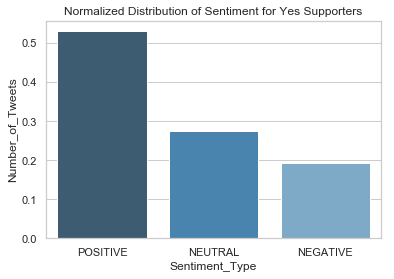

In [274]:
#Show the sentiment distribution based on sentiment_type
sns.set(style="whitegrid")
Sentiment_type_Y = sns.barplot(x=Sentiment_tweets_yes.Sentiment_Type, y=Sentiment_tweets_yes.Number_of_Tweets, palette="Blues_d")
Sentiment_type_Y.set_title('Normalized Distribution of Sentiment for Yes Supporters')

In [275]:
#SUBSET OF TWEETS ('YES_VOTE') WHEN SENTIMENT ANALYSIS WAS DONE ON THE ENTIRE DATASET
All_T_YES = tweets[tweets['Yes_VOTE']]

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Tweet Sentiment for Yes Supporters From 13-04-2018 to 04-06-2018')

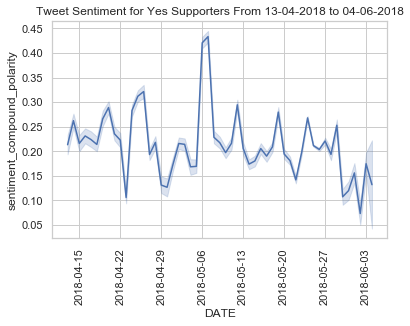

In [276]:
#Analysis of Sentiment compound polarity for yes supporters using the full dataset analysis 
H = sns.lineplot(x=tweets_yes.DATE, y=tweets_yes.sentiment_compound_polarity, data=tweets_yes)
plt.xticks(rotation=90)
H.set_title('Tweet Sentiment for Yes Supporters From 13-04-2018 to 04-06-2018')

In [277]:
tweets_yes['sentiment_type'].value_counts()

POSITIVE    263769
NEUTRAL     137199
NEGATIVE    96475 
Name: sentiment_type, dtype: int64

# Analysis of No Supporters 

In [278]:
tweets_no.shape

(100306, 38)

In [279]:
tweets_no['news'].value_counts()

0    100228
1    78    
Name: news, dtype: int64

In [280]:
users_no = tweets_no.drop_duplicates(subset='Screenname')
users_no.shape

(17574, 38)

In [281]:
Sentiment_tweets_no = pd.DataFrame(tweets_no['sentiment_type'].value_counts(normalize=True).reset_index())
Sentiment_tweets_no

,index,sentiment_type
0,POSITIVE,0.428319
1,NEGATIVE,0.314587
2,NEUTRAL,0.257093


In [282]:
Sentiment_tweets_no.columns = Sentiment_tweets_no.columns.str.replace('index','Sentiment_Type')
Sentiment_tweets_no.columns = Sentiment_tweets_no.columns.str.replace('sentiment_type','Number_of_Tweets')
Sentiment_tweets_no

,Sentiment_Type,Number_of_Tweets
0,POSITIVE,0.428319
1,NEGATIVE,0.314587
2,NEUTRAL,0.257093


Text(0.5,1,'Normalized Distribution of Sentiment for Yes Supporters')

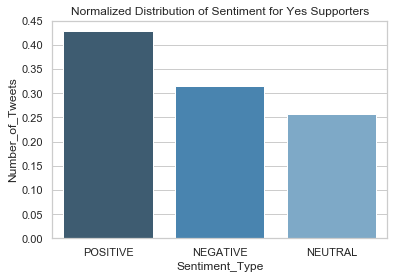

In [283]:
#Show the sentiment distribution based on sentiment_type
sns.set(style="whitegrid")
Sentiment_type_N = sns.barplot(x=Sentiment_tweets_no.Sentiment_Type, y=Sentiment_tweets_no.Number_of_Tweets, palette="Blues_d")
Sentiment_type_N.set_title('Normalized Distribution of Sentiment for Yes Supporters')

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1,'Tweet Sentiment for No Supporters From 13-04-2018 to 04-06-2018')

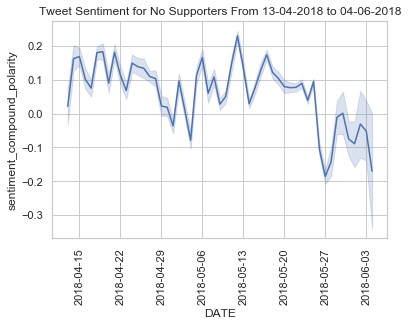

In [284]:
#Analysis of Sentiment compound polarity for yes supporters using the full dataset analysis 
H = sns.lineplot(x=tweets_no.DATE, y=tweets_no.sentiment_compound_polarity, data=tweets_no)
plt.xticks(rotation=90)
H.set_title('Tweet Sentiment for No Supporters From 13-04-2018 to 04-06-2018')

In [285]:
tweets_no['sentiment_type'].value_counts()

POSITIVE    42963
NEGATIVE    31555
NEUTRAL     25788
Name: sentiment_type, dtype: int64

In [286]:
RT_Sentiment_all = tweets[['sentiment_type','text','favorite_count','sentiment_compound_polarity','Screenname','retweet_count','news']]
RT_Sentiment_all = RT_Sentiment_all.sort_values(by=['retweet_count'],ascending=False) 
RT_Sentiment_all

,sentiment_type,text,favorite_count,sentiment_compound_polarity,Screenname,retweet_count,news
568402,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,_aditya_kumar_,21556.0,False
545713,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,crs68,21556.0,False
519048,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,Nicoli_Mitchell,21556.0,False
545709,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,Rosalindtalbot,21556.0,False
545696,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,Stanky_Bean,21556.0,False
545732,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,eleanorhowse,21556.0,False
463716,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,Steel1864,21556.0,False
545753,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,knolloz,21556.0,False
545744,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,EponyMowse,21556.0,False
519111,NEGATIVE,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",0,-0.3182,wakeyrule,21556.0,False


/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



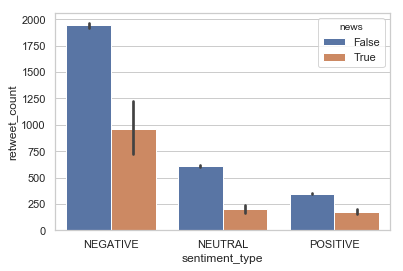

In [287]:
sns.barplot(x=RT_Sentiment_all.sentiment_type, y=RT_Sentiment_all.retweet_count,hue=RT_Sentiment_all.news)

# Top Favourite, Retweeted and Followed 

In [256]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000 
TopRT = tweets3.sort_values(by=['retweet_count'],ascending=False)
TopRT = TopRT [['DATE','retweet_count','text','Screenname','retweet_screen_name','user_followers_count','sentiment_type','support','screen_nc','screen_yc','news','scpol']]
Unique_TOPRT = TopRT.drop_duplicates(subset='retweet_screen_name')
Unique_TOPRT.head(11)

,DATE,retweet_count,text,Screenname,retweet_screen_name,user_followers_count,sentiment_type,support,screen_nc,screen_yc,news,scpol
568402,2018-05-25,21556.0,"RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",_aditya_kumar_,MorabitoCM,100,NEGATIVE,2,0,0,0,0
384271,2018-05-25,21555.0,"As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being denied an abortion for a pregnancy even after doctors said miscarriage was inevitable. Her death was a catalyst for this referendum. She was 31. https://t.co/EcZm95xrEl",MorabitoCM,NaN,815,NEGATIVE,2,0,0,0,0
1959541,2018-05-11,19223.0,RT @NicolaSturgeon: Should Scotland be an independent country? RT if you intend to #voteYES,stevie_lindsay,NicolaSturgeon,250,NEUTRAL,2,0,0,0,0
1681708,2018-04-27,6470.0,RT @DanielAndrewsMP: The Golden Girls got it in the '80s.\n\nHopefully Australia agrees in 2017.\n\n#VoteYes. https://t.co/URIYpzp7hF,MLQVH3928,DanielAndrewsMP,9,POSITIVE,2,0,0,0,0
870303,2018-05-26,6230.0,RT @laurafleur: Irish women who have come #hometovote arriving at Dublin airport. https://t.co/jTMm1xg9a1,BrownsKitchen,laurafleur,835,NEUTRAL,1,0,0,0,0
894787,2018-05-26,5427.0,RT @casaguglielmi: This photo. 🇮🇪 #HometoVote https://t.co/GFAYX6AfsM,IseaKor,casaguglielmi,221,NEUTRAL,1,0,0,0,0
1451394,2018-06-03,5074.0,RT @juventusfc: #ItsTime to be proud. https://t.co/CjRwJFdnuh,TrueInterista,juventusfc,132,POSITIVE,2,0,0,0,0
749186,2018-05-25,5040.0,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,RobsPuddin,britainelects,757,POSITIVE,4,0,0,0,0
2001806,2018-05-13,4889.0,RT @Together4yes: An open letter calling for a Yes vote on May 25. \n\nWe are all #together4yes\n\nVote Yes on May 25 for a more caring and com…,anna_ingliss,Together4yes,293,POSITIVE,2,0,0,0,0
43429,2018-05-22,4844.0,"RT @GrahamPenrose2: The Pry Minister is #watching you - be concerned, #Repeal the #IPBill #GCHQ #MassSurveillance #Orwellian #NoPrivacy htt…",AnonymousCronic,GrahamPenrose2,1093,NEUTRAL,2,0,0,0,0


In [289]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000 
TopFav = tweets3.sort_values(by=['favorite_count'], ascending=False)
TopFav = TopFav [['DATE','favorite_count','text','Screenname','user_followers_count','sentiment_type','support']]
TopFav.head(10)

,DATE,favorite_count,text,Screenname,user_followers_count,sentiment_type,support
198430,2018-05-24,51516,I have just been transferred to a hospice as my treatment for stage 4 breast cancer has stopped. I have just lost power in my legs so will be going to vote in a wheelchair for first time. If I can you can. Well I hope I can 😊 #VoteYes #Together4Yes,KAYDO6,1227,NEGATIVE,2
137560,2018-05-23,46517,Just collected eldest son from Dublin Airport. In 2015 Ireland gave him his right - the right to get married. \nOn Friday he’ll return the favour and vote to give women the right to make decisions about their own bodies. #Together4Yes #hometovote #soproud,MchughNoeleen,291,POSITIVE,2
384271,2018-05-25,43812,"As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being denied an abortion for a pregnancy even after doctors said miscarriage was inevitable. Her death was a catalyst for this referendum. She was 31. https://t.co/EcZm95xrEl",MorabitoCM,815,NEGATIVE,2
707703,2018-05-25,37331,My granny is as old as the Irish State. She just voted #yes #Repealthe8th #Together4Yes 😭😍 https://t.co/b1JTLxuusO,hannahmdeasy,1213,NEUTRAL,2
467277,2018-05-25,35688,"Big day for Ireland today. Not normally one for asking people to vote one way or another. But as an Irish son and brother, no state should have the right to tell a woman what to do with her body. #Repealthe8th",radioleary,2829221,NEGATIVE,2
326721,2018-05-24,35385,"A vote for the freedom to choose, a vote for women's rights, a vote for women's control over their bodies, a vote for women's health &amp; safety, a vote towards equality. Thinking of Ireland #together4yes #repealthe8th https://t.co/CDNj9KoSGt",EmmaWatson,28560343,POSITIVE,2
289719,2018-05-24,33562,Irish women who have come #hometovote arriving at Dublin airport. https://t.co/jTMm1xg9a1,laurafleur,7766,NEUTRAL,1
267640,2018-05-24,33408,"Last minute decision to go #hometovote to #repealthe8th No flights left from London, so I have a 4 hour train, 4 hour wait and 3 hour ferry to make it home to vote- which is a walk in the park in comparison to the journey that Irish women are making every day to the UK",MichelleMarleyy,284,NEGATIVE,2
39501,2018-05-22,33340,Keep your nose out of my dick. #TogetherForYes https://t.co/QDPQuG8hlc,Kathbum,405462,NEGATIVE,2
1194172,2018-05-16,32791,"Today in Ireland, if a woman is raped and impregnated, who then takes an abortion pill, will find herself liable to get a jail sentence longer than the man who raped her.\n\nLet that sink in. \nWe need to get rid of the 8th\nThis is barbaric\n\n#repealthe8th #together4yes #voteyes #YES",becksk,1070,NEGATIVE,2


In [290]:
top_users = tweets3.drop_duplicates(subset='Screenname')
top_users.shape

(259379, 39)

In [291]:
top_users = top_users.sort_values(by=['user_followers_count'],ascending=False)
top_users = top_users[['Screenname','user_statuses_count','user_followers_count','support','screen_nc','screen_yc','news','scpol','friend_foll_ratio']]
top_10 = top_users.head(10)
top_10.to_csv('top_users.csv')

In [292]:
#location_filtering
df_Ire=tweets3[tweets3['user_location'].str.match('Ireland|Munster|Connacht|Ulster|Antrim|Armagh|Carlow|Cavan|Clare|Cork|Derry|Donegal|Down|Dublin|Fermanagh|Galway|Kerry|Kildare|Kilkenny|Laois|Leitrim|Limerick|Longford|Louth|Mayo|Meath|Monaghan|Offaly|Roscommon|Sligo|Tipperary|Tyrone|Waterford|Westmeath|Wexford|Wicklow',case=False)==True]
print(df_Ire.shape)

(358979, 39)


In [293]:
df_Ire.columns

Index(['DATE', 'TIME', 'hashtags', 'urls', 'contains_url', 'favorite_count',
       'is_retweet', 'retweet_count', 'Logged_RT_count', 'retweet_screen_name',
       'retweet_yc', 'retweet_nc', 'rtpol', 'RT', 'text', 'text_news',
       'sentiment_compound_polarity', 'sentiment_type', 'Yes_VOTE', 'No_VOTE',
       'news_content', 'Yes_camp', 'No_camp', 'poltweet', 'friend_foll_ratio',
       'user_statuses_count', 'user_location', 'Screenname',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'screen_yc', 'screen_nc', 'scpol', 'news',
       'campaign_support', 'support', 'camp_total'],
      dtype='object')

In [294]:
top_users_ire = df_Ire.drop_duplicates(subset='Screenname')

In [295]:
top_users_ire = top_users_ire[['Screenname','user_location','user_statuses_count','user_description','user_followers_count','support','screen_nc','screen_yc','news','scpol','friend_foll_ratio']]
top_users_ire = top_users_ire.sort_values(by='user_followers_count',ascending=False)
topusers = top_users_ire.head(10)
topusers.to_csv('topusersIre.csv')

In [296]:
URLS = tweets3[tweets3['contains_url']==1]
topRT_url = URLS.sort_values(by='retweet_count',ascending=False)
topRT_url[['DATE','urls','retweet_count','Screenname','retweet_screen_name','retweet_yc','retweet_nc','rtpol','RT','text','sentiment_type','screen_yc','support','screen_nc','scpol','news']]
topRT_url.head(30)

,DATE,TIME,hashtags,urls,contains_url,favorite_count,is_retweet,retweet_count,Logged_RT_count,retweet_screen_name,retweet_yc,retweet_nc,rtpol,RT,text,text_news,sentiment_compound_polarity,sentiment_type,Yes_VOTE,No_VOTE,news_content,Yes_camp,No_camp,poltweet,friend_foll_ratio,user_statuses_count,user_location,Screenname,user_description,user_favourites_count,user_followers_count,user_friends_count,screen_yc,screen_nc,scpol,news,campaign_support,support,camp_total
326721,2018-05-24,21:27:11,"together4yes , repealthe8th",https://www.togetherforyes.ie,1,35385,True,7333.0,8.900140,NaN,0,0,0,False,"A vote for the freedom to choose, a vote for women's rights, a vote for women's control over their bodies, a vote for women's health &amp; safety, a vote towards equality. Thinking of Ireland #together4yes #repealthe8th https://t.co/CDNj9KoSGt",0,0.7906,POSITIVE,1,0,0,False,False,False,74765.295812,1642,NaN,EmmaWatson,NaN,991,28560343,382,0,0,0,0,0,2,0
737008,2018-05-25,21:08:01,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.211823,12480,"Madison, Wisconsin",AlaynaCzech,Left my ❤ in Scotland | Student of History | Rugby player | Travel bug | Equality for all |\nOn Wisconsin | #intersectionalfeminism | Socialist | Mostly Retweets,25541,129,609,0,0,0,0,0,4,0
752790,2018-05-25,21:31:23,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.200000,321,"Tain, Scotland",oliver_mountjoy,"Highland resident, data and elections obsessive.",377,24,20,0,0,0,0,0,4,0
736409,2018-05-25,21:07:05,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.620690,10900,"Manchester, England",ektopping,20.,22077,611,377,0,0,0,0,0,4,0
881395,2018-05-26,09:01:18,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,12.340832,26293,"London, England",leninology,"Author 'Corbyn’. Commissioning editor @ Salvage. Writing @ LRB, Vice, AJE, Guardian. Patreon: https://t.co/HfuV0Yk4gg Rep: https://t.co/nn6K8ZnDTw",2500,21942,1778,0,0,0,0,0,4,0
752811,2018-05-25,21:31:24,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.510438,5813,NaN,PME_Politics,"@shefmethods Q-step postdoc. Psephologist and R/Stata geek. Study public views on migration and

In [297]:
topRT_url.drop_duplicates(subset='text')
topRT_url.head(1000)

,DATE,TIME,hashtags,urls,contains_url,favorite_count,is_retweet,retweet_count,Logged_RT_count,retweet_screen_name,retweet_yc,retweet_nc,rtpol,RT,text,text_news,sentiment_compound_polarity,sentiment_type,Yes_VOTE,No_VOTE,news_content,Yes_camp,No_camp,poltweet,friend_foll_ratio,user_statuses_count,user_location,Screenname,user_description,user_favourites_count,user_followers_count,user_friends_count,screen_yc,screen_nc,scpol,news,campaign_support,support,camp_total
326721,2018-05-24,21:27:11,"together4yes , repealthe8th",https://www.togetherforyes.ie,1,35385,True,7333.0,8.900140,NaN,0,0,0,False,"A vote for the freedom to choose, a vote for women's rights, a vote for women's control over their bodies, a vote for women's health &amp; safety, a vote towards equality. Thinking of Ireland #together4yes #repealthe8th https://t.co/CDNj9KoSGt",0,0.7906,POSITIVE,1,0,0,False,False,False,74765.295812,1642,NaN,EmmaWatson,NaN,991,28560343,382,0,0,0,0,0,2,0
737008,2018-05-25,21:08:01,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,0.211823,12480,"Madison, Wisconsin",AlaynaCzech,Left my ❤ in Scotland | Student of History | Rugby player | Travel bug | Equality for all |\nOn Wisconsin | #intersectionalfeminism | Socialist | Mostly Retweets,25541,129,609,0,0,0,0,0,4,0
752790,2018-05-25,21:31:23,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.200000,321,"Tain, Scotland",oliver_mountjoy,"Highland resident, data and elections obsessive.",377,24,20,0,0,0,0,0,4,0
736409,2018-05-25,21:07:05,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.620690,10900,"Manchester, England",ektopping,20.,22077,611,377,0,0,0,0,0,4,0
881395,2018-05-26,09:01:18,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,12.340832,26293,"London, England",leninology,"Author 'Corbyn’. Commissioning editor @ Salvage. Writing @ LRB, Vice, AJE, Guardian. Patreon: https://t.co/HfuV0Yk4gg Rep: https://t.co/nn6K8ZnDTw",2500,21942,1778,0,0,0,0,0,4,0
752811,2018-05-25,21:31:24,"Referendum2018 , repealthe8th , savethe8th",https://www.irishtimes.com/news/politics/irish-times-exit-poll-projects-ireland-has-voted-by-landslide-to-repeal-eighth-amendment-1.3508861,1,0,True,5040.0,8.525161,britainelects,0,0,0,False,RT @britainelects: Irish Times #Referendum2018 exit poll:\n\nYes (#repealthe8th): 68%\nNo (#savethe8th): 32%\n\nvia https://t.co/kYvG6w6ITa http…,0,0.1280,POSITIVE,1,2,0,False,False,False,1.510438,5813,NaN,PME_Politics,"@shefmethods Q-step postdoc. Psephologist and R/Stata geek. Study public views on migration and

# NEWS TWEETS ANALYSIS

In [298]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000 
RT_Sentiment_compound = tweets[tweets['news']]
RT_Sentiment_compound.sort_values(by=['retweet_count'],ascending=False)

,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,rtt,date1,DATE,TIME,friend_foll_ratio,is_spam,hash,contains_url,is_retweet,Logged_RT_count,desc,screen,news_g,news,RT,text_news,screen_news,news_content,pol,scpol,rtpol,poltweet,screen_yc,retweet_yc,text_yc,Yes_camp,screen_nc,retweet_nc,text_nc,No_camp,Yes_VOTE,No_VOTE,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
659750,NaN,Fri May 25 17:13:12 +0000 2018,"hometovote , RepealThe8th",NaN,NaN,0,1000062239573991429,NaN,NaN,NaN,en,NaN,NaN,21555.0,9.998667e+17,MorabitoCM,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",https://twitter.com/profkeithdevlin/status/1000062239573991429,Sat Jan 23 00:27:44 +0000 2010,profkeithdevlin,False,"Mathematician, author, radio broadcaster, and avid cyclist.",34547,13120,399,719,"Palo Alto, CA, USA",Keith Devlin,profkeithdevlin,57342,NaN,http://profkeithdevlin.com/,True,True,2018-05-25 17:13:12,2018-05-25,17:13:12,32.882206,False,True,False,True,9.978363,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.3182,0.753,0.151,0.096,NEGATIVE
490375,NaN,Fri May 25 09:58:27 +0000 2018,"hometovote , RepealThe8th",NaN,NaN,0,999952829530783744,NaN,NaN,NaN,en,NaN,NaN,21555.0,9.998667e+17,MorabitoCM,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",https://twitter.com/samanthamaiden/status/999952829530783744,Thu Sep 24 03:19:10 +0000 2009,samanthamaiden,False,"Wrangler of 3 children, cat & welsh springer and gardens via Sky News, News Corp Sundays, The Australian, via Adelaide. samanthamaidencanberra@gmail.com",9898,96099,6141,1092,"Lombok Barat, Nusa Tenggara Barat",Samantha Maiden,samanthamaiden,49705,NaN,NaN,True,True,2018-05-25 09:58:27,2018-05-25,09:58:27,15.648754,False,True,False,True,9.978363,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.3182,0.753,0.151,0.096,NEGATIVE
385292,NaN,Fri May 25 04:31:22 +0000 2018,"hometovote , RepealThe8th",NaN,NaN,0,999870514876252161,NaN,NaN,NaN,en,NaN,NaN,21555.0,9.998667e+17,MorabitoCM,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @MorabitoCM: As Ireland goes #hometovote to #RepealThe8th today, please remember Savita Halappanavar who died of sepsis after being deni…",https://twitter.com/jljacobson/status/999870514876252161,Thu Feb 19 12:13:16 +0000 2009,jljacobson,False,"Analyst, writer, mom. Feminist. Thinker & doer. Realist & dreamer. Progressive but not predictable. Editor-in-Chief, @Rewire_news. UW Madison alum.",7216,18535,5142,807,"Washington, DC",Jodi Jacobson,jljacobson,71815,NaN,http://rewire.news,True,True,2018-05-25 04:31:22,2018-05-25,04:31:22,3.604629,False,True,False,True,9.978363,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,-0.3182,0.753,0.151,0.096,NEGATIVE
444172,NaN,Fri May 25 08:16:14 +0000 2018,"hometovote , RepealThe8th",NaN,NaN,0,999927106929811456,NaN,NaN,NaN,en,NaN,NaN,21555.0,9.998667e+17,MorabitoCM,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @MorabitoCM: As Ireland goes #ho

In [300]:
RT_Sentiment_compound.sentiment_compound_polarity.describe()

count    6183.000000
mean        0.145353
std         0.364921
min        -0.976500
25%         0.000000
50%         0.000000
75%         0.401900
max         0.979100
Name: sentiment_compound_polarity, dtype: float64

In [301]:
RT_Sentiment_compound.dtypes

coordinates                     object
Date_Time                       object
hashtags                        object
media                           object
urls                            object
favorite_count                   int64
id                               int64
in_reply_to_screen_name         object
in_reply_to_status_id          float64
in_reply_to_user_id            float64
lang                            object
place                           object
possibly_sensitive              object
retweet_count                  float64
reweet_id                      float64
retweet_screen_name             object
source                          object
text                            object
tweet_url                       object
user_Date_Time                  object
user_screen_name                object
user_default_profile_image        bool
user_description                object
user_favourites_count            int64
user_followers_count             int64
user_friends_count       

In [302]:
RT_Sentiment_compound['Hfollowers'] = RT_Sentiment_compound['user_followers_count'] > 319670
RT_Sentiment_compound['Hfollowers'].value_counts()

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



False    5180
True     1003
Name: Hfollowers, dtype: int64

In [303]:
RT_Sentiment_compound['log_retweet'] = np.log(RT_Sentiment_compound.retweet_count)
#USERDATA['log_friends'] = np.log(USERDATA.user_friends_count)
RT_Sentiment_compound

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,coordinates,Date_Time,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_Date_Time,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,Screenname,user_statuses_count,user_time_zone,user_urls,user_verified,rtt,date1,DATE,TIME,friend_foll_ratio,is_spam,hash,contains_url,is_retweet,Logged_RT_count,desc,screen,news_g,news,RT,text_news,screen_news,news_content,pol,scpol,rtpol,poltweet,screen_yc,retweet_yc,text_yc,Yes_camp,screen_nc,retweet_nc,text_nc,No_camp,Yes_VOTE,No_VOTE,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Hfollowers,log_retweet
1457682,NaN,Fri Apr 13 15:08:40 +0000 2018,"8thref , BKNT",NaN,NaN,0,984810607542259713,NaN,NaN,NaN,en,NaN,NaN,3.0,9.847461e+17,BreakfastNT,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @BreakfastNT: What regulation exists in the area of poster placement on lamp posts for the #8thref? Very little. #BKNT investigated http…,https://twitter.com/NewstalkFM/status/984810607542259713,Tue Mar 03 17:10:41 +0000 2009,NewstalkFM,False,"We aim to engage, challenge, inform, and entertain. Tune in to Newstalk 106-108FM.\n\nhttps://t.co/xnOJA6CLCJ\nhttps://t.co/0oG246fivS",3047,214775,1565,1311,Ireland,Newstalk,NewstalkFM,187587,NaN,http://www.newstalk.com,True,True,2018-04-13 15:08:40,2018-04-13,15:08:40,137.236422,False,True,False,True,1.098612,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,1.000,0.000,0.000,NEUTRAL,False,1.098612
1458318,NaN,Fri Apr 13 16:22:05 +0000 2018,8thref,https://twitter.com/CJAMcMahon/status/984829085384937472/photo/1,http://iuni.iu.edu/hoaxy-botometer-demo/#query=8thref&sort=mixed&type=Twitter,0,984829085384937472,NaN,NaN,NaN,en,NaN,False,1.0,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Very interesing tinkering around with the @TruthyAtIndiana Hoaxy tool: doesn't seem to be much bot activity on the #8thref hashtag https://t.co/pL3XvUWmDz https://t.co/NWv3deXjr2,https://twitter.com/CJAMcMahon/status/984829085384937472,Wed Dec 16 13:38:55 +0000 2009,CJAMcMahon,False,"Psychology, technology, and everything in between. #socialmedia #cybersecurity\nGet my weekly newsletter https://t.co/S0qYZCCq5g",13720,2802,1252,150,"Dublin, Ireland",Ciarán Mc Mahon,CJAMcMahon,26830,NaN,http://www.ciaranmcmahon.ie,True,False,2018-04-13 16:22:05,2018-04-13,16:22:05,2.238019,False,True,True,True,0.000000,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0000,1.000,0.000,0.000,NEUTRAL,False,0.000000
1458403,NaN,Fri Apr 13 16:29:30 +0000 2018,"twitter , repeal , savethe8th , abortion",NaN,https://www.irishtimes.com/news/ireland/irish-news/twitter-rejects-charges-from-irish-anti-abortion-campaigners-1.3460951#.WtDa2LQ5b-0.twitter,1,984830951778914309,NaN,NaN,NaN,en,NaN,False,0.0,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter rejects charges from Irish anti-abortion campaigners #twitter #repeal #savethe8th #abortion https://t.co/GQG7GccrTT via @IrishTimes,https://twitter.com/MarkHennessy/status/984830951778914309,Sat Apr 04 11:44:00 +0000 2009,MarkHennessy,False,"News Editor, The Irish Times. Opinions, such as they are, are one's own......",87,6240,2766,193,"Dublin City, Ireland",Mark Hennessy,MarkHennessy,5248,NaN,http://irishtimes.com,True,False,2018-04-13 16:29:30,2018-04-13,16:29:30,2.255965,False,True,True,False,-inf,True,False,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,-0.6486,0.694,0.306,0.000,NEGATIVE,False,-inf
1458425,NaN,Fri Apr 13 16:31:28 +0000 20

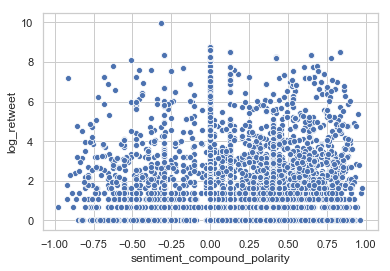

In [304]:
sns.scatterplot(x=RT_Sentiment_compound.sentiment_compound_polarity, y=RT_Sentiment_compound.log_retweet)

In [306]:
RT_Sentiment_Type = news_df[['sentiment_type','retweet_count','user_followers_count']]

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



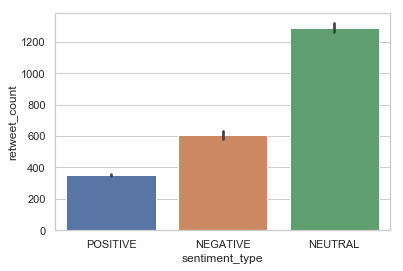

In [307]:
sns.barplot(x=RT_Sentiment_Type.sentiment_type, y=RT_Sentiment_Type.retweet_count)

# Regression Plots 

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



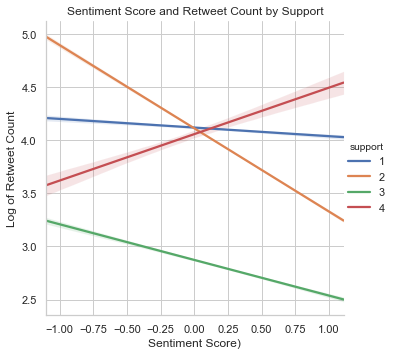

In [313]:
reg1 = sns.lmplot(x="sentiment_compound_polarity",y="Logged_RT_count",data=tweets4,hue="support", scatter = False)
reg1.set(xlabel = 'Sentiment Score)', ylabel = 'Log of Retweet Count')
reg1 = plt.title("Sentiment Score and Retweet Count by Support")

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



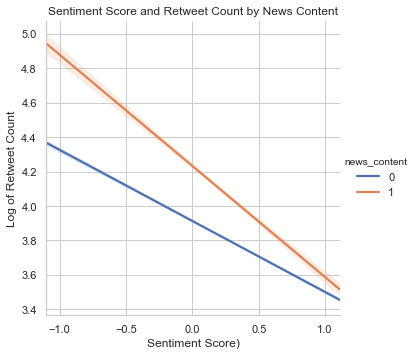

In [314]:
reg_news = sns.lmplot(x="sentiment_compound_polarity", y = "Logged_RT_count", data = tweets4, hue = "news_content", scatter=False)
reg_news.set(xlabel = 'Sentiment Score)', ylabel = 'Log of Retweet Count')
reg_news = plt.title("Sentiment Score and Retweet Count by News Content")

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



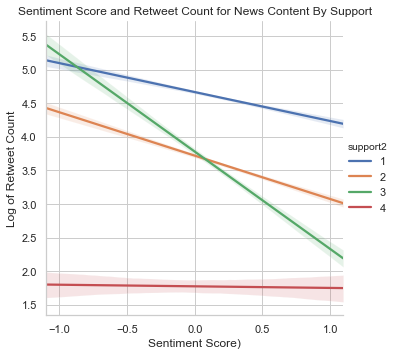

In [315]:
reg3 = sns.lmplot(x="sentiment_compound_polarity",y="Logged_RT_count",data=news_df,hue="support2", scatter = False)
reg3.set(xlabel = 'Sentiment Score)', ylabel = 'Log of Retweet Count')
reg3 = plt.title("Sentiment Score and Retweet Count for News Content By Support")

In [316]:
campaign_data2 = campaign_data[campaign_data['is_retweet']]
campaign_data.shape, campaign_data2.shape

((17567, 39), (16524, 39))

In [317]:
pol_data2 = pol_data[pol_data['is_retweet']]
pol_data.shape, pol_data2.shape

((2829, 39), (2747, 39))

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



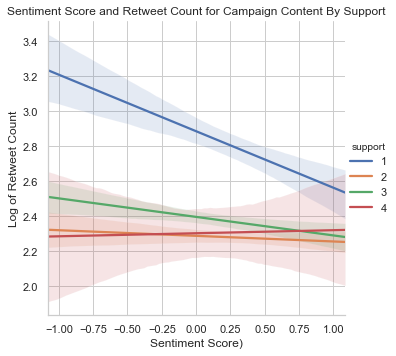

In [318]:
camp = sns.lmplot(x="sentiment_compound_polarity",y="Logged_RT_count",data=campaign_data2,hue="support",scatter=False)
camp.set(xlabel = 'Sentiment Score)', ylabel = 'Log of Retweet Count')
camp = plt.title("Sentiment Score and Retweet Count for Campaign Content By Support")

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



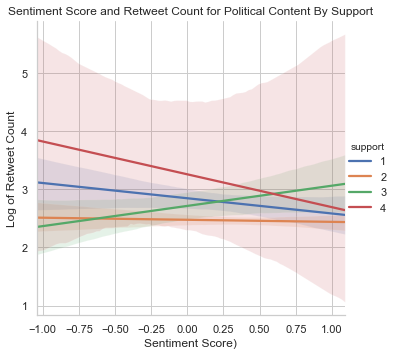

In [319]:
pol = sns.lmplot(x="sentiment_compound_polarity",y="Logged_RT_count",data=pol_data2,hue="support",scatter=False)
pol.set(xlabel = 'Sentiment Score)', ylabel = 'Log of Retweet Count')
pol = plt.title("Sentiment Score and Retweet Count for Political Content By Support")

/Users/trishaharjani/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



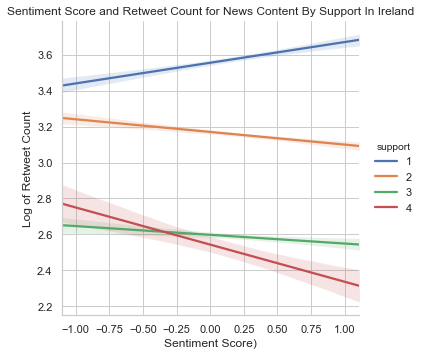

In [320]:
Ire = sns.lmplot(x="sentiment_compound_polarity",y="Logged_RT_count",data=Ireland,hue="support",scatter=False)
Ire.set(xlabel = 'Sentiment Score)', ylabel = 'Log of Retweet Count')
Ire = plt.title("Sentiment Score and Retweet Count for News Content By Support In Ireland")